In [3]:
import pandas as pd
import numpy as np
import warnings
import math
import statistics
warnings.simplefilter('ignore')
import Floors
import Leases
import Currency
import Label 
import ModelPrep
import CompanySize
import NYSE

In [2]:
# TishmanTenants, YahooData = NYSE.processing()

In [3]:
# TishmanTenants.to_csv('Tenants_with_NYSECode_and_YahooData.csv')
# YahooData.to_csv('YahooData.csv')

In [4]:
TishmanTenants = pd.read_csv('Tenants_with_NYSECode_and_YahooData.csv')

In [5]:
#initialize lease data that is already joined with long/lat data
leases = Leases.create()

#Floors conversion
leases = Floors.processing(leases)

#Currency conversion
leases = Currency.processing(leases)

#Label/Target Creation
leases = Label.processing(leases)

# create csv for tenants for financial information gathering
#leases.Tenant.drop_duplicates().to_csv('tenants_for_priceindex.csv', index = False)

#joining company size information 
#Adds 'Empoyee Count', 'Company Size'(Categorical) as features 
leases = pd.merge(leases,CompanySize.processing(),left_on = 'Tenant', right_on = 'Tenant',how='left')

#joining NYSE Financial Information
#Adds specified Month stock prices & NYSE Code as features
leases = NYSE.preprocessing(TishmanTenants,leases)

modeling_data = ModelPrep.processing(leases)

0.0 % Complete
0.07785563341118897 % Complete
0.15571126682237793 % Complete
0.2335669002335669 % Complete
0.31142253364475586 % Complete
0.3892781670559448 % Complete
0.4671338004671338 % Complete
0.5449894338783228 % Complete
0.6228450672895117 % Complete
0.7007007007007007 % Complete
0.7785563341118896 % Complete
0.8564119675230787 % Complete
0.9342676009342676 % Complete


In [19]:
# modeling_data.to_csv('Final_Modeling_Data.csv')

## Start Here

In [33]:
import pandas as pd
import numpy as np
import warnings
import math
import statistics
warnings.simplefilter('ignore')
import Floors
import Leases
import Currency
import Label 
import ModelPrep
import CompanySize
import NYSE

In [34]:
modeling_data = pd.read_csv('Final_Modeling_Data.csv')

In [35]:
#altered numeric_cols to incl new USD cols and drop old non-USD currency cols
numeric_cols = ['StartingPerSqFt_USD','EndingPerSqFt_USD','MaxPerSqFt_USD','StartingCharge_USD','EndingCharge_USD','MaxCharge_USD',
                'TotalSpent_USD','UnitArea','LeaseLengthDays','MonthsFreeRent','FreeRentAmount_USD','NumPriceChanges',
                'NumRentCharges','NumFreeRentPeriods','LeaseLengthMonths', 'charge_percent_change', 'lease_length', 
                'sq_foot_percent_change', 'NumericFloor', 'AmountofFloors', 'MaxRateIncrease', 'AvgRateIncrease',
                'lat_lon_x', 'lat_lon_y', 'lat_lon_z','hist_count','hist_months','hist_usdSpend','simult_count',\
               'simult_months','simult_usdSpend']

columns_notusing = ['Renewal','Vacate','LeaseSource','LeaseExpiration','ToDate','Unit','ContractId'
'TenantId','Tenant','PropertyName','PropertyId','FromDate','Currency','LeaseCommencement',
'IsCurrentLease','LeaseID','PropertyIsActive','BillingType','Mistake','IsRenewal',
'ZoLaunchDate','LastLease','ZoUsedNoRenewal', 'lat,lon','StartingCharge','EndingCharge','MaxCharge',
                    'StartingPerSqFt','EndingPerSqFt','MaxPerSqFt','TotalSpent','FreeRentAmount', 'Floor', #'Reason',
                   'ReasonDescription', 'ContinuedRelationship', 'IsTS', 'TenantFinanceStart', 'TenantFinanceEnd', 'finance_percent_change', 'EmployeeCount']

categorical_cols = [i for i in modeling_data.columns.tolist() if ((i not in columns_notusing) and (i not in numeric_cols))][2:] #ContractId and TenantId still come through, so removing that



In [36]:
categorical_cols_analysis = pd.DataFrame(columns = ['category', 'unique_values', 'null_percent'])
categorical_cols_analysis.category = categorical_cols
categorical_cols_analysis.unique_values = categorical_cols_analysis.category.apply(lambda x: len(modeling_data[x].unique()))
# categorical_cols_analysis.has_nulls = categorical_cols_analysis.category.apply(lambda x: 1 if modeling_data[x].isnull().sum() > 0 else 0)
categorical_cols_analysis.null_percent = categorical_cols_analysis.category.apply(lambda x: modeling_data[x].isnull().sum()/modeling_data.shape[0]*100)

In [37]:
categorical_cols_analysis.round(0).sort_values(['null_percent'], ascending = False)

,category,unique_values,null_percent
9,Reason,9,40.0
26,address,84,23.0
4,Subregion,6,21.0
24,PropNumber,69,16.0
25,Property,102,15.0
7,ConstructionType,3,13.0
0,Industry,38,13.0
6,Use_Type,3,3.0
5,Country,8,3.0
2,City,31,3.0


In [38]:
numeric_cols_analysis = pd.DataFrame(columns = ['category','null_percent'])
numeric_cols_analysis.category = numeric_cols
numeric_cols_analysis.null_percent = numeric_cols_analysis.category.apply(lambda x: modeling_data[x].isnull().sum()/modeling_data.shape[0]*100)

In [39]:
numeric_cols_analysis.round(0).sort_values(['null_percent'], ascending = False)

,category,null_percent
24,lat_lon_z,23.0
23,lat_lon_y,23.0
22,lat_lon_x,23.0
17,sq_foot_percent_change,14.0
0,StartingPerSqFt_USD,0.0
16,lease_length,0.0
29,simult_months,0.0
28,simult_count,0.0
27,hist_usdSpend,0.0
26,hist_months,0.0


In [40]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [41]:
modeling_data['AmountofFloors'].value_counts()

1     3868
3        1
14       1
Name: AmountofFloors, dtype: int64

In [42]:
from sklearn import preprocessing

corr_df = modeling_data[numeric_cols + ['ContinuedRelationship']]

numeric_cols_modeling = corr_df.columns


#which numeric columns have nans
numeric_nan_cols = [numeric_cols_modeling[i]  for i in range(len(numeric_cols_modeling))if (corr_df[numeric_cols_modeling].isnull().sum().tolist()[i] > 0)]

#replace nans with means
for col_name in numeric_nan_cols:
    #create a new column that indicates that column had nulls originally
#     new_col = col_name + '_hasnulls'
#     corr_df[new_col] = corr_df.apply(lambda x: has_nulls(x, col_name), axis=1)
    
    #add new_col to categorical_col list
#     categorical_cols_modeling.append(new_col)
    
    #replace nans in the column with the mean
    col_mean = np.nanmean(corr_df[col_name])
    corr_df[col_name] = corr_df.apply(lambda x: ModelPrep.numeric_replace_null_with_mean(x, col_name, col_mean), axis=1)

corr_df_normed = corr_df[corr_df.columns.tolist()]

for col in corr_df_normed.columns:
    normalization=preprocessing.MinMaxScaler()
#     print(corr_df_normed[col].tolist())
    corr_df_normed[col] = normalization.fit_transform(corr_df_normed[[col]])

CORRELATION BEFORE NORMALIZED


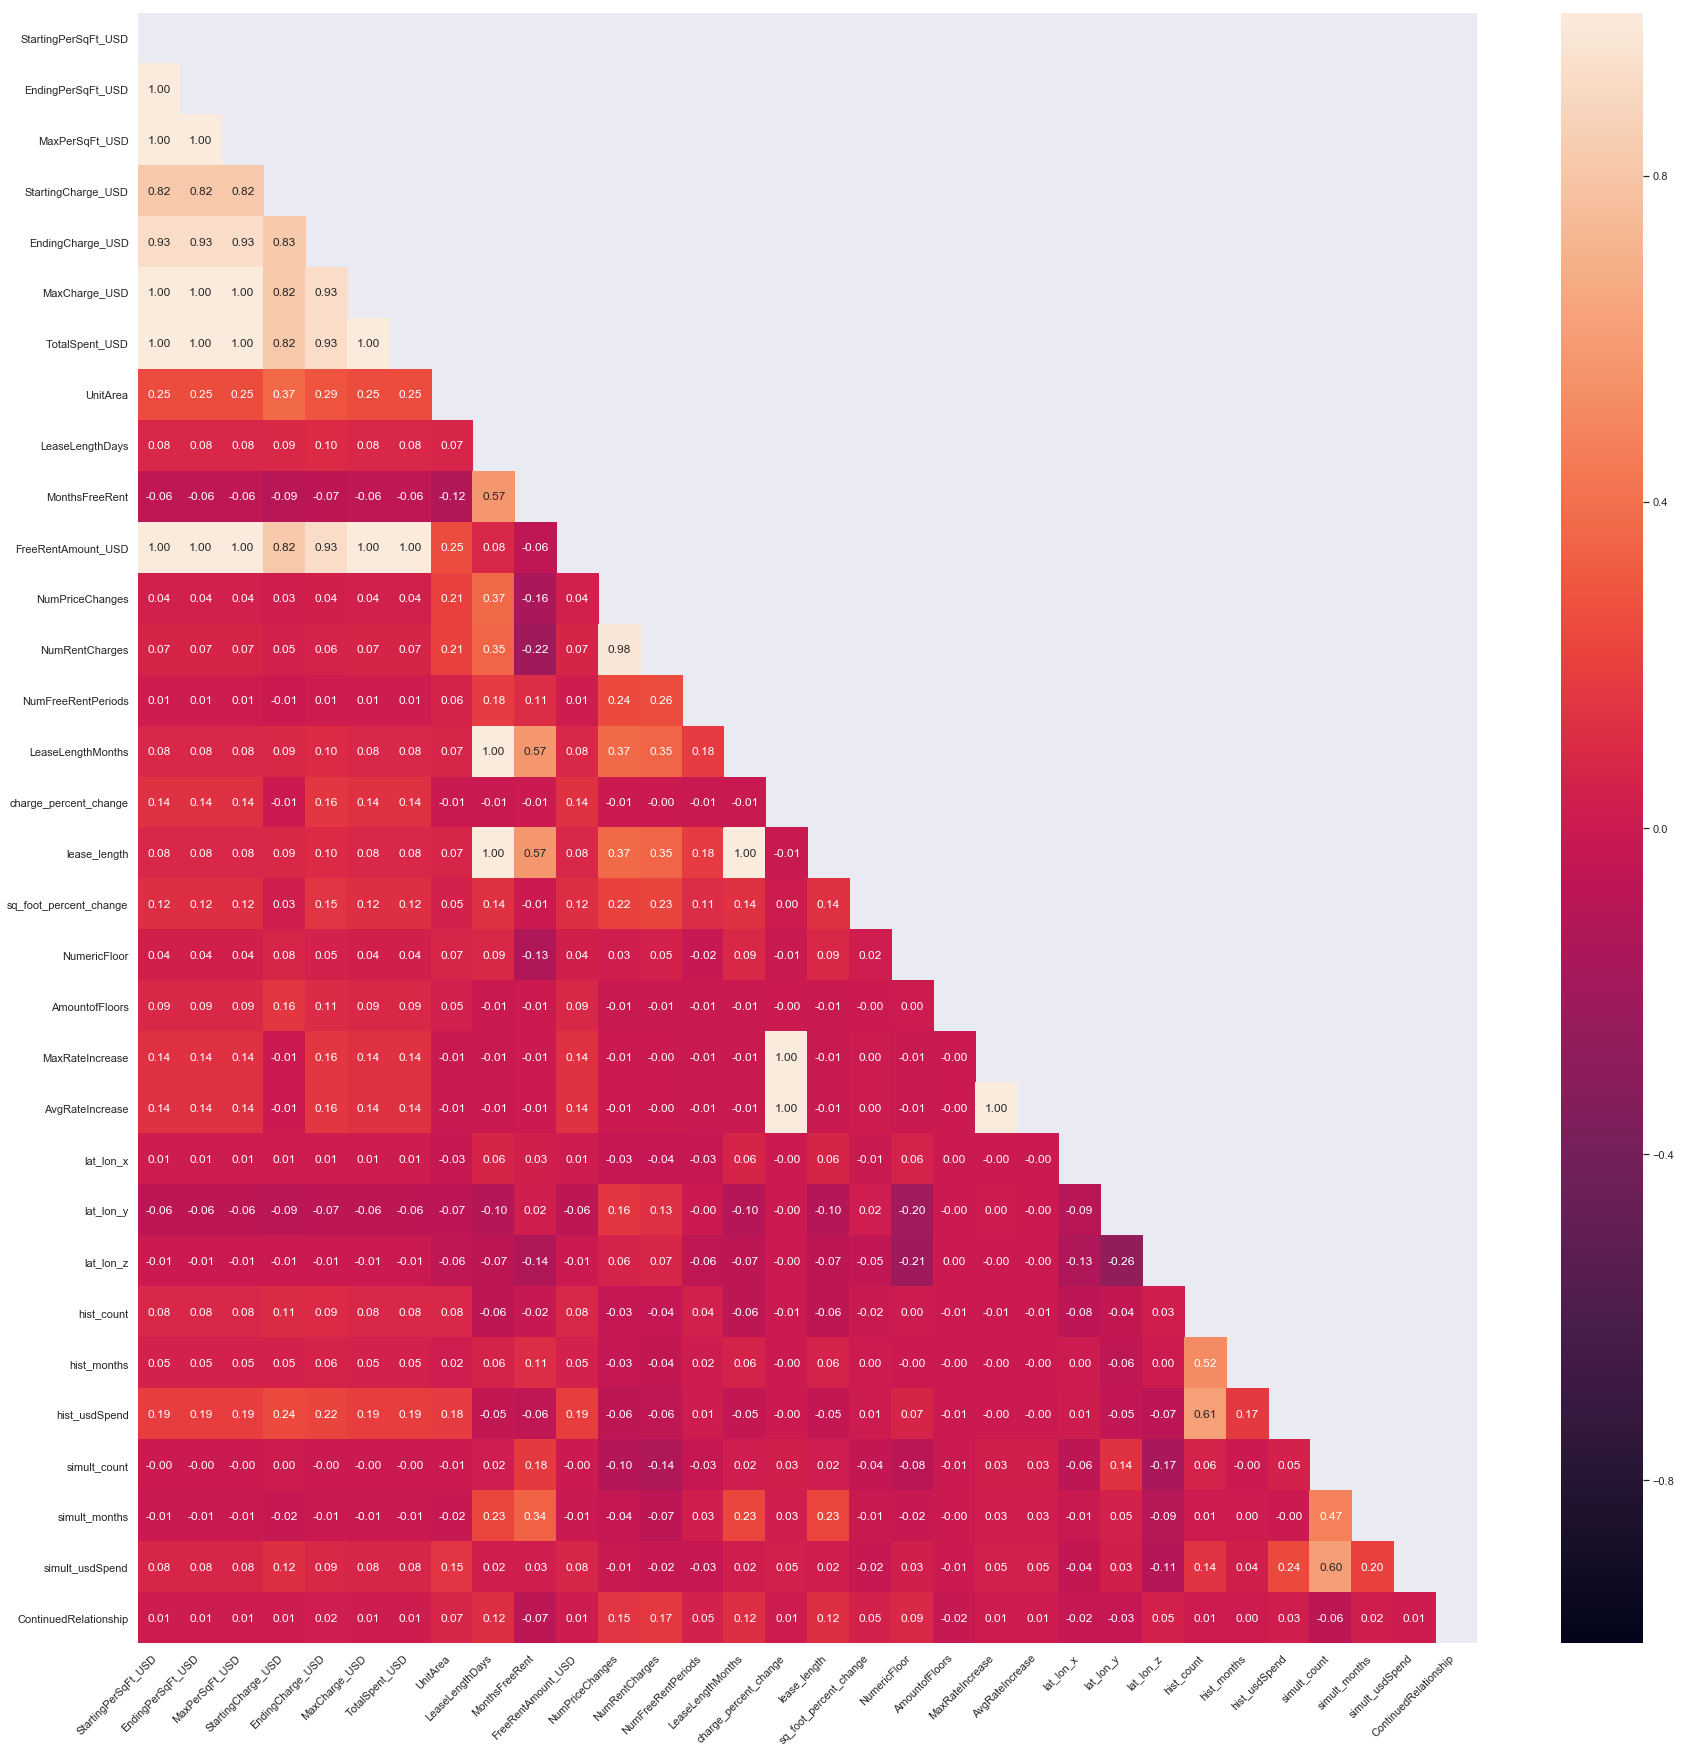

In [43]:
cor = corr_df_normed.corr()
print('CORRELATION BEFORE NORMALIZED')
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(30,30))
ax = sns.heatmap(cor, annot = True, vmin=-1, mask = mask, fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [44]:
#keeping charge_percent_change, removing MaxRateIncrease, AvgRateIncrease
#keeping lease_length, removing LeaseLengthDays, LeaseLengthMonths
#keeping NumPriceChanges, removing NumRentCharges
#keeping StartingCharge_USD removing 'EndingPerSqFt_USD','MaxPerSqFt_USD','StartingCharge_USD','EndingCharge_USD','MaxCharge_USD','TotalSpent_USD','FreeRentAmount_USD'

numeric_cols_correlation_remove = ['MaxRateIncrease', 'AvgRateIncrease', 'LeaseLengthDays', 'LeaseLengthMonths', 
                                   'NumRentCharges','EndingPerSqFt_USD','MaxPerSqFt_USD','StartingCharge_USD',
                                   'EndingCharge_USD','MaxCharge_USD','TotalSpent_USD','FreeRentAmount_USD',
                                  'TenantFinanceStart', 'TenantFinanceEnd']

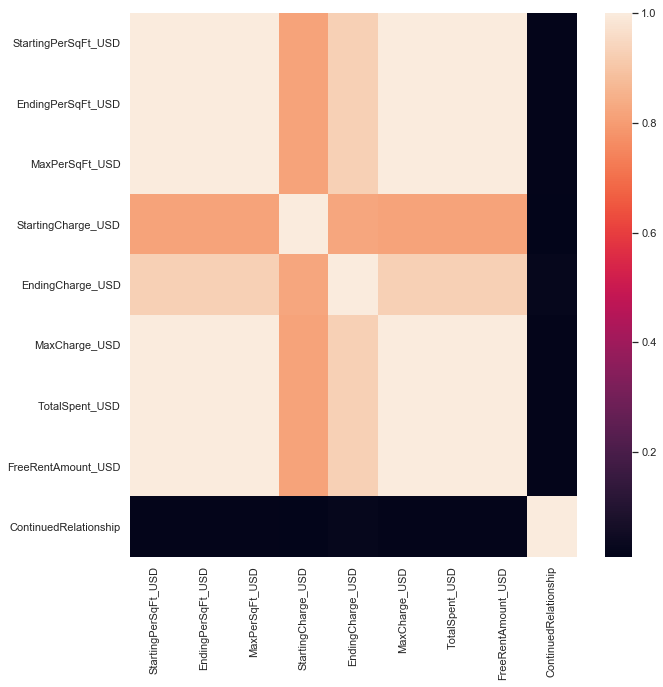

In [45]:
# Checking to see if one of the columns are more correlated than the other
USD_cols = ['StartingPerSqFt_USD','EndingPerSqFt_USD','MaxPerSqFt_USD','StartingCharge_USD','EndingCharge_USD',
            'MaxCharge_USD','TotalSpent_USD','FreeRentAmount_USD']
plt.figure(figsize=(10,10))
ax = sns.heatmap(modeling_data[USD_cols + ['ContinuedRelationship']].corr())

In [46]:
modeling_data[USD_cols + ['ContinuedRelationship']].corr()['ContinuedRelationship']

StartingPerSqFt_USD      0.013376
EndingPerSqFt_USD        0.013376
MaxPerSqFt_USD           0.013376
StartingCharge_USD       0.009048
EndingCharge_USD         0.021718
MaxCharge_USD            0.013376
TotalSpent_USD           0.013376
FreeRentAmount_USD       0.013376
ContinuedRelationship    1.000000
Name: ContinuedRelationship, dtype: float64

CORRELATION AFTER


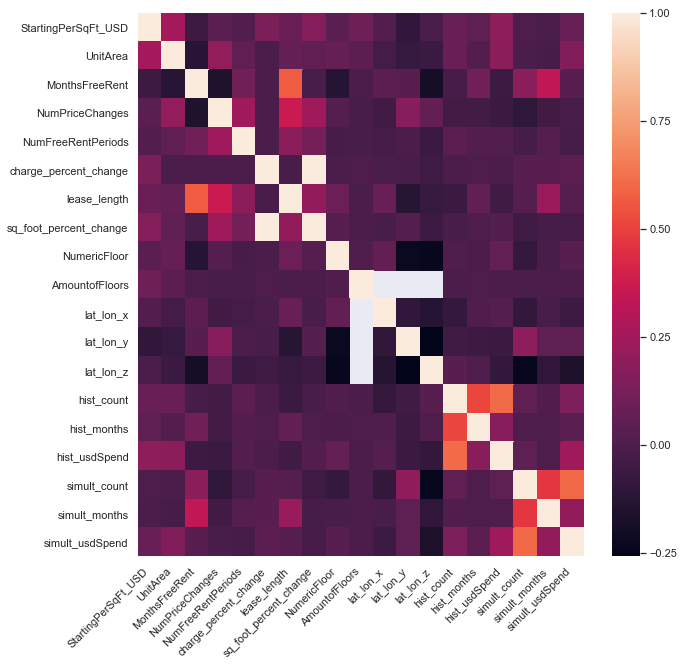

In [47]:
print('CORRELATION AFTER')
plt.figure(figsize=(10,10))
ax = sns.heatmap(modeling_data[[i for i in numeric_cols if i not in numeric_cols_correlation_remove]].corr())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

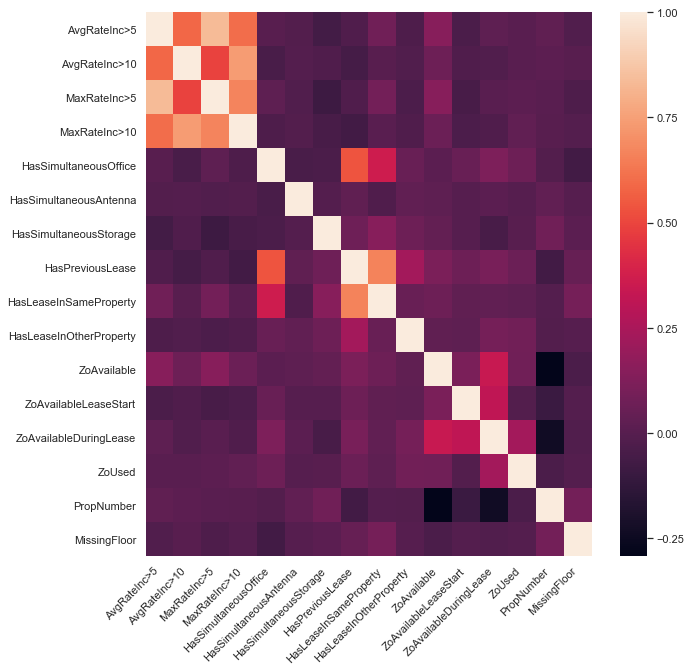

In [48]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(modeling_data[categorical_cols].corr())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [49]:
modeling_data[['AvgRateInc>5', 'MaxRateInc>5'] + ['ContinuedRelationship']].corr()['ContinuedRelationship']

AvgRateInc>5             0.097508
MaxRateInc>5             0.124354
ContinuedRelationship    1.000000
Name: ContinuedRelationship, dtype: float64

In [50]:
#keeping MaxRateInc>5 removing AvgRateInc>5
#keeping GreaterCity removing City
#keeping PropertyLoc removing Country
#keeping PropertyName removing address and PropertyNumber

categorical_cols_correlation_remove = ['AvgRateInc>5', 'City', 'Country', 'address', 'PropNumber']

In [51]:
categorical_cols_modeling = [i for i in categorical_cols if i not in categorical_cols_correlation_remove]

# which categorical columns have nans
categorical_nan_cols = [categorical_cols_modeling[i]  for i in range(len(categorical_cols_modeling))if (modeling_data[categorical_cols_modeling].isnull().sum().tolist()[i] > 0)]

#replace nans with string nans
for col_name in categorical_nan_cols:
    #create a new column that indicates that column had nulls originally
    new_col = col_name + '_hasnulls'
    modeling_data[new_col] = modeling_data.apply(lambda x: ModelPrep.has_nulls(x, col_name), axis=1)
    
    #add new_col to categorical_col list
    categorical_cols_modeling.append(new_col)
    
    #replace nans in the column with the string nan
    col_mode = 'na'
    modeling_data[col_name] = modeling_data.apply(lambda x: ModelPrep.replace_nan_with_str_nan(x, col_name), axis=1)

In [52]:
numeric_cols_modeling = [i for i in numeric_cols if i not in numeric_cols_correlation_remove]

#which numeric columns have nans
numeric_nan_cols = [numeric_cols_modeling[i]  for i in range(len(numeric_cols_modeling))if (modeling_data[numeric_cols_modeling].isnull().sum().tolist()[i] > 0)]

#replace nans with means
for col_name in numeric_nan_cols:
    #create a new column that indicates that column had nulls originally
    new_col = col_name + '_hasnulls'
    modeling_data[new_col] = modeling_data.apply(lambda x: ModelPrep.has_nulls(x, col_name), axis=1)
    
    #add new_col to categorical_col list
    categorical_cols_modeling.append(new_col)
    
    #replace nans in the column with the mean
    col_mean = np.nanmean(modeling_data[col_name])
    modeling_data[col_name] = modeling_data.apply(lambda x: ModelPrep.numeric_replace_null_with_mean(x, col_name, col_mean), axis=1)

In [53]:
#label encode company size in specific way as ordering matters
modeling_data.loc[modeling_data[modeling_data['CompanySize']=='Unknown'].index,'CompanySize'] = 0
modeling_data.loc[modeling_data[modeling_data['CompanySize']=='2-10'].index,'CompanySize'] = 1
modeling_data.loc[modeling_data[modeling_data['CompanySize']=='11-50'].index,'CompanySize'] = 2
modeling_data.loc[modeling_data[modeling_data['CompanySize']=='51-200'].index,'CompanySize'] = 3
modeling_data.loc[modeling_data[modeling_data['CompanySize']=='201-500'].index,'CompanySize'] = 4
modeling_data.loc[modeling_data[modeling_data['CompanySize']=='501-1000'].index,'CompanySize'] = 5
modeling_data.loc[modeling_data[modeling_data['CompanySize']=='1001-5000'].index,'CompanySize'] = 6
modeling_data.loc[modeling_data[modeling_data['CompanySize']=='5001-10,000'].index,'CompanySize'] = 7
modeling_data.loc[modeling_data[modeling_data['CompanySize']=='10,000+'].index,'CompanySize'] = 8

# Convert Text Fields to Numeric

In [54]:
from sklearn import preprocessing

le_list = ['Industry', 'PropertyLoc', 'GreaterCity', 'Subregion', 'Use_Type', 'ConstructionType', 'UnitType', 'Reason', 'Property']
for col in le_list: #categorical_cols_modeling:
    le=preprocessing.LabelEncoder()
    le.fit(modeling_data[col].tolist())
    modeling_data[col] = le.transform(modeling_data[col])

In [55]:
#get one hot encodings
#modeling_copy = modeling_data.copy()
#modeling_copy = modeling_copy.drop(columns=['HasSimultaneousOffice','HasSimultaneousAntenna', 'HasSimultaneousStorage', 'HasPreviousLease',
#       'HasLeaseInSameProperty', 'HasLeaseInOtherProperty','ZoAvailableLeaseStart', 'ZoAvailableDuringLease', 'ZoUsed','Industry_hasnulls',
#       'PropertyLoc_hasnulls', 'GreaterCity_hasnulls', 'Subregion_hasnulls','Use_Type_hasnulls', 'ConstructionType_hasnulls', 'UnitType_hasnulls','Reason_hasnulls', 'Property_hasnulls','sq_foot_percent_change_hasnulls', 'lat_lon_x_hasnulls',
#       'ContinuedRelationship','AvgRateInc>10','MaxRateInc>5', 'MaxRateInc>10','ZoAvailable'
#       'lat_lon_y_hasnulls', 'lat_lon_z_hasnulls','MissingFloor','StartingPerSqFt_USD','UnitArea','MonthsFreeRent','NumPriceChanges','NumFreeRentPeriods','charge_percent_change','lease_length','sq_foot_percent_change','NumericFloor','AmountofFloors',
#       'lat_lon_x','lat_lon_y','lat_lon_z','hist_count','hist_months','hist_usdSpend','simult_count','simult_months','simult_usdSpend',])
#print(modeling_copy.columns)

onehotenc = preprocessing.OneHotEncoder(sparse=False)
onehotenc.fit(modeling_data[le_list])
onehot_data = onehotenc.transform(modeling_data[le_list]) #.toarray()
onehot_cols = onehotenc.get_feature_names(list(modeling_data[le_list].columns))
onehot_data = pd.DataFrame(onehot_data, columns=onehot_cols)
onehot_data.head(5)

,Industry_0.0,Industry_1.0,Industry_2.0,Industry_3.0,Industry_4.0,Industry_5.0,Industry_6.0,Industry_7.0,Industry_8.0,Industry_9.0,...,Property_92.0,Property_93.0,Property_94.0,Property_95.0,Property_96.0,Property_97.0,Property_98.0,Property_99.0,Property_100.0,Property_101.0
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
categorical_cols_modeling = list(set(categorical_cols_modeling) - set(le_list))
print(categorical_cols_modeling)
cols_to_use = numeric_cols_modeling + categorical_cols_modeling + ['ContinuedRelationship']

['HasPreviousLease', 'Subregion_hasnulls', 'AvgRateInc>10', 'lat_lon_x_hasnulls', 'ZoUsed', 'MissingFloor', 'ZoAvailableDuringLease', 'ConstructionType_hasnulls', 'HasLeaseInOtherProperty', 'UnitType_hasnulls', 'HasLeaseInSameProperty', 'Reason_hasnulls', 'PropertyLoc_hasnulls', 'Use_Type_hasnulls', 'MaxRateInc>5', 'ZoAvailableLeaseStart', 'ZoAvailable', 'HasSimultaneousOffice', 'CompanySize', 'lat_lon_y_hasnulls', 'HasSimultaneousStorage', 'Industry_hasnulls', 'GreaterCity_hasnulls', 'MaxRateInc>10', 'sq_foot_percent_change_hasnulls', 'Property_hasnulls', 'HasSimultaneousAntenna', 'lat_lon_z_hasnulls']


In [58]:
# Only getting the columns that we want to use for modeling
modeling_data = modeling_data[cols_to_use]
data_to_concat = [modeling_data, onehot_data]
modeling_data = pd.concat(data_to_concat,axis=1)

# split into train and test
#X_train, X_test, y_train, y_test = train_test_split(modeling_data.drop(['ContinuedRelationship'], axis = 1), modeling_data['ContinuedRelationship'], test_size=0.20, random_state=42)

# use train to split into train and val
#X_train, X_val, y_train, y_val =  train_test_split(X_train, y_train, test_size=0.20, random_state=42)

#split into train and test for k-fold cross validation
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(modeling_data.drop(['ContinuedRelationship'], axis = 1),\
                                            modeling_data['ContinuedRelationship'], test_size=0.1, random_state=42)

#reset the indices so that indices generated from cross validation match
X_train_cv.reset_index(inplace=True,drop=True)
y_train_cv.reset_index(inplace=True,drop=True)

In [59]:
#check renewal vs. churn occurences of classes
total_records=len(y_train)+len(y_val)+len(y_test)
per_renew=(np.sum(y_train)+np.sum(y_val)+np.sum(y_test))/total_records
per_churn=1-per_renew
print("Breakdown of renew vs. churn class percentages:")
print("Renew: "+str(per_renew))
print("Churn: "+str(per_churn))

NameError: name 'y_train' is not defined

In [60]:
total_records=len(y_train)+len(y_val)+len(y_test)
name = ['TRAIN', 'VAL', 'TEST']
datasets_y = [y_train, y_val, y_test]
for i in range(len(datasets_y)):
    print("\nBreakdown of %s renew vs. churn class percentages:" %name[i].upper())
    per_renew=np.sum(datasets_y[i])/datasets_y[i].shape[0]
    per_churn=1-per_renew
    print("Renew: "+str(per_renew))
    print("Churn: "+str(per_churn))

#add printout for the cross validation datasets
name_cv = ['TRAIN/VAL', 'TEST']
datasets_y_cv = [y_train_cv, y_test_cv]
for i in range(len(datasets_y_cv)):
    print("\nBreakdown of Cross Validation %s renew vs. churn class percentages:" %name_cv[i].upper())
    per_renew=np.sum(datasets_y_cv[i])/datasets_y_cv[i].shape[0]
    per_churn=1-per_renew
    print("Renew: "+str(per_renew))
    print("Churn: "+str(per_churn))
    #print("\n")

NameError: name 'y_train' is not defined

In [61]:
#plot renewal vs. churn class percentges

import matplotlib as mpl
mpl.rcParams['font.size'] = 14.0

renewal_ct=0
churn_ct=0
for i in range(len(datasets_y_cv)):
    renewal_ct+=len(datasets_y_cv[i][datasets_y_cv[i]==1])
    churn_ct+=len(datasets_y_cv[i][datasets_y_cv[i]==0])

plotlist=[renewal_ct,churn_ct]
plt.pie(plotlist,radius=1.5,startangle=79,autopct='%1.1f%%')
plt.title("Renewal vs. Churn Class % Breakdown\n\n", size=15)
plt.legend(labels=['Renewals','Churn'],loc='upper left', prop={'size': 13})
plt.show()



NameError: name 'datasets_y_cv' is not defined

### Normalizing Numeric Fields

In [62]:
from sklearn import preprocessing

In [63]:
normalization = preprocessing.MinMaxScaler()
normalization.fit(X_train[numeric_cols_modeling], y_train)
X_train_norm = normalization.transform(X_train[numeric_cols_modeling].values)
X_val_norm = normalization.transform(X_val[numeric_cols_modeling].values)
X_test_norm = normalization.transform(X_test[numeric_cols_modeling].values)

X_train[numeric_cols_modeling] = X_train_norm
X_val[numeric_cols_modeling] = X_val_norm
X_test[numeric_cols_modeling] = X_test_norm

#normalize separately for k-fold cross validation split
normalization_cv=preprocessing.MinMaxScaler()
normalization.fit(X_train_cv[numeric_cols_modeling],y_train_cv)
X_train_norm_cv = normalization.transform(X_train_cv[numeric_cols_modeling].values)
X_test_norm_cv = normalization.transform(X_test_cv[numeric_cols_modeling].values)

X_train_cv[numeric_cols_modeling] = X_train_norm_cv
X_test_cv[numeric_cols_modeling] = X_test_norm_cv

NameError: name 'X_train' is not defined

In [64]:
#drop value-add columns for baseline calc without feature engineering
X_train_baseline  = X_train_cv.copy()

cols_notusing_baseline = ['Renewal','Vacate','LeaseSource','LeaseExpiration','ToDate','Unit',#'ContractId',
'Tenant','PropertyName','PropertyId','FromDate','Currency','LeaseCommencement',
'IsCurrentLease','LeaseID','PropertyIsActive','BillingType','Mistake','IsRenewal',
'charge_percent_change', 'lease_length', 'sq_foot_percent_change', 'NumericFloor', 'AmountofFloors',
'ZoLaunchDate','LastLease','ZoUsedNoRenewal', 'lat,lon',
'StartingPerSqFt','EndingPerSqFt','MaxPerSqFt','TotalSpent','FreeRentAmount',
'ReasonDescription', 'ContinuedRelationship', 'IsTS', 'TenantFinanceStart', 'TenantFinanceEnd', 
'finance_percent_change', 'EmployeeCount', 'lat_lon_x', 'lat_lon_y', 'lat_lon_z','hist_count',
'hist_months','hist_usdSpend','simult_count','simult_months','simult_usdSpend', 'CompanySize', 'MissingFloor',
'lat_lon_x_hasnulls','lat_lon_z_hasnulls']

#diff =list(set(columns_notusing) - set(cols_notusing_baseline))
diff =list(set(cols_notusing_baseline) - set(columns_notusing))
print(diff)

X_train_baseline = X_train_baseline.drop(diff, axis=1)
#print(list(X_train_baseline.columns))

['lat_lon_z', 'charge_percent_change', 'simult_usdSpend', 'lat_lon_y', 'AmountofFloors', 'lat_lon_x', 'simult_months', 'hist_count', 'simult_count', 'sq_foot_percent_change', 'hist_months', 'NumericFloor', 'hist_usdSpend', 'lat_lon_x_hasnulls', 'MissingFloor', 'lease_length', 'CompanySize', 'lat_lon_z_hasnulls']


In [65]:
#print stats about the splits
total_records = (len(X_train)+len(X_val)+len(X_test))
print("Total Records:"+str(total_records))
print("\nTrain/Val/Test Splits:")
print("Train Size: "+str(len(X_train))+", Train %: "+str(round((len(X_train)/total_records),4)))
print("Val Size: "+str(len(X_val))+", Val %: "+str(round((len(X_val)/total_records),4)))
print("Test Size: "+str(len(X_test))+", Test %: "+str(round((len(X_test)/total_records),4)))
print("\nK-Fold Cross Validtion Splits:")
print("Train/Val Size: "+str(len(X_train_cv))+", Train %: "+str(round((len(X_train_cv)/total_records),4)))
print("Test Size: "+str(len(X_test_cv))+", Test %: "+str(round((len(X_test_cv)/total_records),4)))

NameError: name 'X_train' is not defined

TypeError: only size-1 arrays can be converted to Python scalars

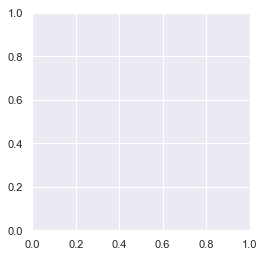

In [66]:
#visual for k-fold cross validation splits
mpl.rcParams['font.size'] = 16.0
plotlist=[len(X_train_cv),len(X_test_cv)]
def absolute_value(val):
    a  = np.int(val/100.*(plotlist[0]+plotlist[1]))
    b = np.round(val/100,2)
    return a, b
plt.pie([plotlist],radius=1.5,autopct=absolute_value)#startangle=79,)
plt.title("Train/Val vs. Test Sizes for CV\n\n", size=15)
plt.legend(labels=['Train/Val','Test'],loc='upper left', prop={'size': 13})
plt.show()

### Model Tuning

In [67]:
import itertools
import math
import os
from sklearn.metrics import f1_score,roc_curve, auc, roc_auc_score, log_loss, precision_score, recall_score
from sklearn.model_selection import cross_validate, KFold
import multiprocessing
from joblib import Parallel, delayed

In [68]:
#define sort metric, save str to append, CPUs for parallelization
sort_metric = 'Specificity'
save_version = ''
num_cores = multiprocessing.cpu_count()

In [542]:
#create DF to store best validation result achieved across each model type
allmodel_df = pd.DataFrame(columns=['Model Type','Accuracy','F1','AUC','Log Loss','Precision','Recall','Specificity'])
allmodel_baseline_df = pd.DataFrame(columns=['Model Type','Accuracy','F1','AUC','Log Loss','Precision','Recall','Specificity'])
allmodel_baseline_noFE = pd.DataFrame(columns=['Model Type','Accuracy','F1','AUC','Log Loss','Precision','Recall','Specificity'])

In [456]:
#legacy function without cross validation, not actually used anymore
def sklearn_gridsearch(model,modeltype_str,params,results_df,test_or_val):
    #fit model and generate preds
    model.fit(X_train,y_train)
    if test_or_val=='val':
        preds = model.predict(X_val)
        probabilities = model.predict_proba(X_val)
        accuracy = model.score(X_val,y_val)
        f1 = f1_score(preds,y_val, average='micro')
        fpr, tpr, _ = roc_curve(y_val, preds)
        auc_score = roc_auc_score(y_val,np.amax(probabilities,axis=1))
        logloss = log_loss(y_val,probabilities)
    elif test_or_val=='test':
        preds = model.predict(X_test)
        probabilities = model.predict_proba(X_test)
        accuracy = model.score(X_test,y_test)
        f1 = f1_score(preds,y_test, average='micro')
        auc_score = roc_auc_score(y_test,np.amax(probabilities,axis=1))
        logloss = log_loss(y_test,probabilities)
    else:
        raise NameError("Final argument to sklearn_gridsearch must be val or test")
    
    #add results to grid & return
    params.insert(0,modeltype_str)
    params.append(accuracy)
    params.append(f1)
    params.append(auc_score)
    params.append(logloss)
    results_df.loc[len(results_df)]=params
    return results_df

In [457]:
#2nd version of gridsearch utilizing 5-fold cross validation
def sklearn_gridsearch_cv(model,modeltype_str,params,results_df,train_or_test):
    if train_or_test=='train':
        scoring = ['accuracy','f1_micro','roc_auc','neg_log_loss','precision','recall']
        scores = cross_validate(model,X_train_cv,y_train_cv,scoring=scoring,cv=5)
        accuracy = np.average(scores['test_accuracy'])
        f1 = np.average(scores['test_f1_micro'])
        auc_score = np.average(scores['test_roc_auc'])
        logloss = np.average(scores['test_neg_log_loss'])*-1
        precision = np.average(scores['test_precision'])
        recall = np.average(scores['test_recall'])
    elif train_or_test=='test':
        model.fit(X_train_cv,y_train_cv)
        preds = model.predict(X_test_cv)
        probabilities = model.predict_proba(X_test_cv)
        accuracy = model.score(X_test_cv,y_test_cv)
        f1 = f1_score(preds,y_test_cv, average='micro')
        #auc_score = roc_auc_score(y_test_cv,np.amax(probabilities,axis=1))
        auc_score = roc_auc_score(y_test_cv,probabilities[:,1])
        logloss = log_loss(y_test_cv,probabilities)
        precision = precision_score(y_test_cv, preds)
        recall = recall_score(y_test_cv, preds)
    else:
        raise NameError("Final Argument to sklearn_gridsearch_cv must be train or test")
    
    params.insert(0,modeltype_str)
    params.append(accuracy)
    params.append(f1)
    params.append(auc_score)
    params.append(logloss)
    params.append(precision)
    params.append(recall)
    results_df.loc[len(results_df)]=params
    return results_df

In [17]:
#3rd version of gridsearch utilizing 5-fold cross validation and seeding for consistent results
def sklearn_gridsearch_cv_wseeding(model,modeltype_str,params,results_df,train_or_test):
    if train_or_test=='train' or train_or_test=='noFE':
        #create empty lists for aggregate scores
        accuracy, f1, auc, logloss, precision, recall, specificity = [],[],[],[],[],[],[]
        
        #create a k-fold split to use in grid search
        kf = KFold(n_splits=5, random_state=42)

        #now create and validate a model for each split, and add scores to agg lists
        for train_index, test_index in kf.split(X_train_cv):
            if train_or_test=='noFE':
                X_train, X_test = X_train_baseline.iloc[train_index], X_train_baseline.iloc[test_index]
            else:
                X_train, X_test = X_train_cv.iloc[train_index], X_train_cv.iloc[test_index]
            y_train, y_test = y_train_cv[train_index], y_train_cv[test_index]
            model.fit(X_train,y_train)
            preds = model.predict(X_test)
            probabilities = model.predict_proba(X_test)
            accuracy_score = model.score(X_test,y_test)
            f1score = f1_score(preds,y_test, average='micro')
            auc_score = roc_auc_score(y_test,probabilities[:,1])
            logloss_score = log_loss(y_test,probabilities)
            precisionscore = precision_score(y_test, preds)
            recallscore = recall_score(y_test, preds)
            #now get the index of the negative results for calculating specificity
            X_test_neg = X_test[y_test==0]
            y_test_neg = y_test[y_test==0]
            specificity_score = model.score(X_test_neg,y_test_neg)
            
            #now add the k-fold results to the list
            accuracy.append(accuracy_score)
            f1.append(f1score)
            auc.append(auc_score)
            logloss.append(logloss_score)
            precision.append(precisionscore)
            recall.append(recallscore)
            specificity.append(specificity_score)
        
        #once all k-fold splits have been run, calculate the average scores
        accuracy = np.average(accuracy)
        f1 = np.average(f1)
        auc = np.average(auc)
        logloss = np.average(logloss)
        precision = np.average(precision)
        recall = np.average(recall)
        specificity = np.average(specificity)
            
    elif train_or_test=='test':
        model.fit(X_train_cv,y_train_cv)
        preds = model.predict(X_test_cv)
        probabilities = model.predict_proba(X_test_cv)
        accuracy = model.score(X_test_cv,y_test_cv)
        f1 = f1_score(preds,y_test_cv, average='micro')
        #auc_score = roc_auc_score(y_test_cv,np.amax(probabilities,axis=1))
        auc = roc_auc_score(y_test_cv,probabilities[:,1])
        logloss = log_loss(y_test_cv,probabilities)
        precision = precision_score(y_test_cv, preds)
        recall = recall_score(y_test_cv, preds)
        #now get the index of the negative results for calculating specificity
        X_test_neg = X_test_cv[y_test_cv==0]
        y_test_neg = y_test_cv[y_test_cv==0]
        specificity = model.score(X_test_neg,y_test_neg)
    else:
        raise NameError("Final Argument to sklearn_gridsearch_cv must be train, test, or noFE")
        
    params.insert(0,modeltype_str)
    params.append(accuracy)
    params.append(f1)
    params.append(auc)
    params.append(logloss)
    params.append(precision)
    params.append(recall)
    params.append(specificity)
    results_df.loc[len(results_df)]=params
    return results_df

In [18]:
#3rd version of gridsearch utilizing 5-fold cross validation and seeding for consistent results
def sklearn_gridsearch_cv_wseeding_parallel(model,modeltype_str,params,train_or_test,X_data=None):
    if train_or_test=='train' or train_or_test=='noFE':
        #create empty lists for aggregate scores
        accuracy, f1, auc, logloss, precision, recall, specificity = [],[],[],[],[],[],[]
        
        #create a k-fold split to use in grid search
        kf = KFold(n_splits=5, random_state=42)

        #now create and validate a model for each split, and add scores to agg lists
        for train_index, test_index in kf.split(X_train_cv):
            if train_or_test=='noFE':
                X_train, X_test = X_train_baseline.iloc[train_index], X_train_baseline.iloc[test_index]
            elif X_data is not None:
                X_train, X_test = X_data.iloc[train_index], X_data.iloc[test_index]
            else:
                X_train, X_test = X_train_cv.iloc[train_index], X_train_cv.iloc[test_index]
            y_train, y_test = y_train_cv[train_index], y_train_cv[test_index]
            model.fit(X_train,y_train)
            preds = model.predict(X_test)
            probabilities = model.predict_proba(X_test)
            accuracy_score = model.score(X_test,y_test)
            f1score = f1_score(preds,y_test, average='micro')
            auc_score = roc_auc_score(y_test,probabilities[:,1])
            logloss_score = log_loss(y_test,probabilities)
            precisionscore = precision_score(y_test, preds)
            recallscore = recall_score(y_test, preds)
            #now get the index of the negative results for calculating specificity
            X_test_neg = X_test[y_test==0]
            y_test_neg = y_test[y_test==0]
            specificity_score = model.score(X_test_neg,y_test_neg)
            
            #now add the k-fold results to the list
            accuracy.append(accuracy_score)
            f1.append(f1score)
            auc.append(auc_score)
            logloss.append(logloss_score)
            precision.append(precisionscore)
            recall.append(recallscore)
            specificity.append(specificity_score)
        
        #once all k-fold splits have been run, calculate the average scores
        accuracy = np.average(accuracy)
        f1 = np.average(f1)
        auc = np.average(auc)
        logloss = np.average(logloss)
        precision = np.average(precision)
        recall = np.average(recall)
        specificity = np.average(specificity)
            
    elif train_or_test=='test':
        model.fit(X_train_cv,y_train_cv)
        preds = model.predict(X_test_cv)
        probabilities = model.predict_proba(X_test_cv)
        accuracy = model.score(X_test_cv,y_test_cv)
        f1 = f1_score(preds,y_test_cv, average='micro')
        #auc_score = roc_auc_score(y_test_cv,np.amax(probabilities,axis=1))
        auc = roc_auc_score(y_test_cv,probabilities[:,1])
        logloss = log_loss(y_test_cv,probabilities)
        precision = precision_score(y_test_cv, preds)
        recall = recall_score(y_test_cv, preds)
        #now get the index of the negative results for calculating specificity
        X_test_neg = X_test_cv[y_test_cv==0]
        y_test_neg = y_test_cv[y_test_cv==0]
        specificity = model.score(X_test_neg,y_test_neg)
    else:
        raise NameError("Final Argument to sklearn_gridsearch_cv must be train, test, or noFE")
        
    params.insert(0,modeltype_str)
    params.append(accuracy)
    params.append(f1)
    params.append(auc)
    params.append(logloss)
    params.append(precision)
    params.append(recall)
    params.append(specificity)
    #results_df.loc[len(results_df)]=params
    return params #results_df

In [19]:
#3rd version of gridsearch utilizing 5-fold cross validation and seeding for consistent results
def sklearn_gridsearch_cv_topN(model,resultlist,X_data):
    #create empty lists for aggregate scores
    accuracy, f1, auc, logloss, precision, recall, specificity = [],[],[],[],[],[],[]

    #create a k-fold split to use in grid search
    kf = KFold(n_splits=5, random_state=42)

    #now create and validate a model for each split, and add scores to agg lists
    for train_index, test_index in kf.split(X_data):
        
        X_train, X_test = X_data.iloc[train_index], X_data.iloc[test_index]
        y_train, y_test = y_train_cv[train_index], y_train_cv[test_index]
        model.fit(X_train,y_train)
        preds = model.predict(X_test)
        probabilities = model.predict_proba(X_test)
        accuracy_score = model.score(X_test,y_test)
        f1score = f1_score(preds,y_test, average='micro')
        auc_score = roc_auc_score(y_test,probabilities[:,1])
        logloss_score = log_loss(y_test,probabilities)
        precisionscore = precision_score(y_test, preds)
        recallscore = recall_score(y_test, preds)
        #now get the index of the negative results for calculating specificity
        X_test_neg = X_test[y_test==0]
        y_test_neg = y_test[y_test==0]
        specificity_score = model.score(X_test_neg,y_test_neg)

        #now add the k-fold results to the list
        accuracy.append(accuracy_score)
        f1.append(f1score)
        auc.append(auc_score)
        logloss.append(logloss_score)
        precision.append(precisionscore)
        recall.append(recallscore)
        specificity.append(specificity_score)
        
    #once all k-fold splits have been run, calculate the average scores
    accuracy = np.average(accuracy)
    f1 = np.average(f1)
    auc = np.average(auc)
    logloss = np.average(logloss)
    precision = np.average(precision)
    recall = np.average(recall)
    specificity = np.average(specificity)
        
    resultlist.append(accuracy)
    resultlist.append(f1)
    resultlist.append(auc)
    resultlist.append(logloss)
    resultlist.append(precision)
    resultlist.append(recall)
    resultlist.append(specificity)
    return resultlist 

### Logistic Regression

In [543]:
#import warnings
#from sklearn.exceptions import ConvergenceWarning
#warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression(random_state=42,solver='lbfgs')

lrm_baseline_df_noFE = pd.DataFrame(columns=['Model Type','penalty','tol','c','fit_intercept','solver','max_iter','warm_start','n_jobs','l1_ratio','Accuracy','F1','AUC','Log Loss','Precision','Recall','Specificity'])
lrm_baseline_df_noFE = sklearn_gridsearch_cv_wseeding(lrm,'Logistic Regression',['default','default','default','default','default','default','default','default','default'], lrm_baseline_df_noFE,'noFE')
print("no feature engineering baseline results:")
display(lrm_baseline_df_noFE)

allmodel_baseline_noFE = allmodel_baseline_noFE.append(pd.Series([lrm_baseline_df_noFE.iloc[0]['Model Type'],lrm_baseline_df_noFE.iloc[0]['Accuracy'],lrm_baseline_df_noFE.iloc[0]['F1'],\
        lrm_baseline_df_noFE.iloc[0]['AUC'],lrm_baseline_df_noFE.iloc[0]['Log Loss'],lrm_baseline_df_noFE.iloc[0]['Precision'],\
        lrm_baseline_df_noFE.iloc[0]['Recall'],lrm_baseline_df_noFE.iloc[0]['Specificity']],index=allmodel_baseline_noFE.columns),ignore_index=True)

lrm_baseline_df = pd.DataFrame(columns=['Model Type','penalty','tol','c','fit_intercept','solver','max_iter','warm_start','n_jobs','l1_ratio','Accuracy','F1','AUC','Log Loss','Precision','Recall','Specificity'])
lrm_baseline_df = sklearn_gridsearch_cv_wseeding(lrm,'Logistic Regression',['default','default','default','default','default','default','default','default','default'], lrm_baseline_df,'train')
print("with feature engineering baseline results:")
display(lrm_baseline_df)

allmodel_baseline_df = allmodel_baseline_df.append(pd.Series([lrm_baseline_df.iloc[0]['Model Type'],lrm_baseline_df.iloc[0]['Accuracy'],lrm_baseline_df.iloc[0]['F1'],\
        lrm_baseline_df.iloc[0]['AUC'],lrm_baseline_df.iloc[0]['Log Loss'],lrm_baseline_df.iloc[0]['Precision'],\
        lrm_baseline_df.iloc[0]['Recall'],lrm_baseline_df.iloc[0]['Specificity']],index=allmodel_baseline_df.columns),ignore_index=True)

no feature engineering baseline results:


,Model Type,penalty,tol,c,fit_intercept,solver,max_iter,warm_start,n_jobs,l1_ratio,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
0,Logistic Regression,default,default,default,default,default,default,default,default,default,0.725533,0.725533,0.802196,0.534614,0.732794,0.796034,0.637094


with feature engineering baseline results:


,Model Type,penalty,tol,c,fit_intercept,solver,max_iter,warm_start,n_jobs,l1_ratio,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
0,Logistic Regression,default,default,default,default,default,default,default,default,default,0.731845,0.731845,0.81024,0.526696,0.737118,0.803211,0.642028


In [462]:
#check the baseline weights
print("baseline weights:")
lrm.fit(X_train_cv,y_train_cv)
columns = X_train_cv.columns.tolist()
weights = lrm.coef_[0]
weights_df = pd.DataFrame(columns=['Column','Feature Importance'])
weights_df['Column'] = columns
weights_df['Feature Importance'] = weights
weights_df.sort_values(by=['Feature Importance'],axis=0,ascending=False).head(10)

baseline weights:


,Column,Feature Importance
16,simult_count,2.158333
221,Property_73.0,2.020637
137,UnitType_16.0,1.837447
182,Property_34.0,1.629579
206,Property_58.0,1.364904
196,Property_48.0,1.267226
18,simult_usdSpend,1.238743
32,ZoUsed,1.221050
190,Property_42.0,1.092490
177,Property_29.0,1.071742


In [463]:
#Test performance with top N Features
weights_df_sorted = weights_df.sort_values(by=['Feature Importance'],axis=0,ascending=False)
topN_results = pd.DataFrame(columns=['N','Specificity','Recall'])

for i in range(1,len(weights_df_sorted)+1):
    train_data = X_train_cv.copy()
    topN_columns = weights_df_sorted.iloc[0:i]['Column'].tolist()
    diff = list(set(X_train_cv.columns.tolist()) - set(topN_columns))
    train_data = train_data.drop(diff, axis=1)
    lr = LogisticRegression(random_state=42,solver='lbfgs')
    result = sklearn_gridsearch_cv_topN(lr, [], train_data)[5:7]
    result_list = [int(i-1), result[1], result[0]]
    topN_results.loc[len( topN_results)]=result_list

In [464]:
print('Top N Feature Count by Specificity was:')
topN_results.sort_values(by=['Specificity'],axis=0,ascending=False).head(1)

Top N Feature Count by Specificity was:


,N,Specificity,Recall
248,248.0,0.646676,0.80379


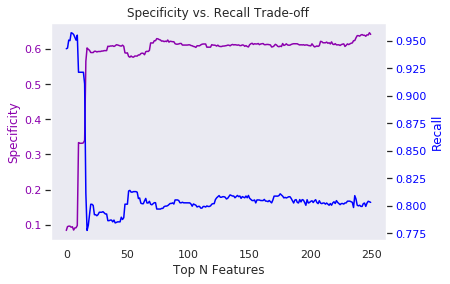

In [465]:
fig, ax1 = plt.subplots()
plt.title('Specificity vs. Recall Trade-off')

color = '#8B00AD'
ax1.set_xlabel('Top N Features')
ax1.set_ylabel('Specificity', color=color)
ax1.plot(topN_results['N'].tolist(), topN_results['Specificity'].tolist(),color=color,label='Specificity')
ax1.tick_params(axis='y',labelcolor=color)
ax1.grid(False)

ax2 = ax1.twinx()
color2 = 'blue'
ax2.set_ylabel('Recall', color=color2)  # we already handled the x-label with ax1
ax2.plot(topN_results['N'].tolist(), topN_results['Recall'].tolist(),color=color2,label='Recall')
ax2.tick_params(axis='y',labelcolor=color2)
ax2.grid(False)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

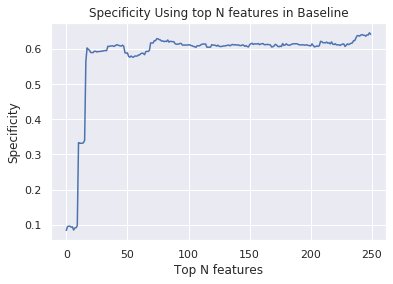

In [466]:
import matplotlib.pyplot as plt

plt.plot(topN_results['N'].tolist(), topN_results['Specificity'].tolist())
#plt.plot(topN_results['N'].tolist(), topN_results['Recall'].tolist())
plt.title('Specificity Using top N features in Baseline')
plt.xlabel('Top N features')
plt.ylabel('Specificity')
plt.show

In [471]:
lr_results = pd.DataFrame(columns=['Model Type','penalty','tol','c','fit_intercept','solver','max_iter','warm_start','n_jobs','l1_ratio','Accuracy','F1','AUC','Log Loss','Precision','Recall','Specificity'])

In [472]:
#read in results if you don't want to train or rerun anything
#lr_results = pd.read_csv("logisticreg_kfold_results_final")

In [473]:
# parallelized version of LR
from sklearn.linear_model import LogisticRegression

#Use data for top N features only for best performance
#topNnum=28
#train_data = X_train_cv.copy()
#topN_columns = weights_df_sorted.iloc[0:topNnum]['Column'].tolist()
#diff = list(set(X_train_cv.columns.tolist()) - set(topN_columns))
#train_data = train_data.drop(diff, axis=1)

#'newton-cg’, ‘sag’ and ‘lbfgs’ support only l2.  ‘elasticnet’ is only supported by the ‘saga’ solver. If ‘none’ (not supported by the liblinear solver), no regularization is applied.
#options for 'newton-cg’, ‘sag’ and ‘lbfgs’ which only support only l2 penalty
penalty = ['l2'] 
tol = [.01, .001, .0001] 
c = [.01, .1, 1.0, 10]
fit_intercept = [False, True] 
solver = ['newton-cg','lbfgs','sag'] 
max_iter = [100, 200, 300]
warm_start = [False, True]
n_jobs = [-1]
l1_ratio = [None] #param ignored unless penalty is elasticnet
param_grid = list(itertools.product(penalty,tol,c,fit_intercept,solver,max_iter,warm_start,n_jobs,l1_ratio))

#options for saga solver and liblinear
penalty = ['l1','l2'] 
tol = [.01, .001, .0001]
c = [.01, .1, 1.0, 10]
fit_intercept = [False,True]
solver = ['saga','liblinear']
max_iter = [100,200,300]
warm_start = [False,True]
n_jobs = [None] #param ignored for liblinear solver
l1_ratio = [None] #param ignored unless penalty is elasticnet
param_grid.extend(list(itertools.product(penalty,tol,c,fit_intercept,solver,max_iter,warm_start,n_jobs,l1_ratio)))

#options for saga solver with elasticnet, which only saga supports
penalty = ['elasticnet'] 
tol = [.01, .001, .0001]
c = [.01, .1, 1.0, 10]
fit_intercept = [False,True]
solver = ['saga']
max_iter = [100,200,300]
warm_start = [False,True]
n_jobs = [-1] 
l1_ratio = [.25,.5,.75] 
param_grid.extend(list(itertools.product(penalty,tol,c,fit_intercept,solver,max_iter,warm_start,n_jobs,l1_ratio)))

results_list = []

def lrc_loop(params):
    
    lrc = LogisticRegression(penalty=params[0],tol=params[1],C=params[2],fit_intercept=params[3],solver=params[4],\
                                                     max_iter=params[5],warm_start=params[6],n_jobs=params[7],l1_ratio=params[8],random_state=42)
    
    return sklearn_gridsearch_cv_wseeding_parallel(lrc,'Logistic Regression',list(params),'train')#,train_data)
    
results_list.append(Parallel(n_jobs=num_cores)(delayed(lrc_loop)(param) for param in param_grid))

for row in results_list[0]:
    lr_results.loc[len(lr_results)]=row

In [474]:
lr_results.sort_values(by=[sort_metric],axis=0,ascending=False).head(5)

,Model Type,penalty,tol,c,fit_intercept,solver,max_iter,warm_start,n_jobs,l1_ratio,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
521,Logistic Regression,l1,0.01,10.0,True,saga,300,True,None,None,0.745628,0.745628,0.823666,0.510766,0.750467,0.811523,0.662860
517,Logistic Regression,l1,0.01,10.0,True,saga,100,True,None,None,0.745628,0.745628,0.823666,0.510766,0.750467,0.811523,0.662860
519,Logistic Regression,l1,0.01,10.0,True,saga,200,True,None,None,0.745628,0.745628,0.823666,0.510766,0.750467,0.811523,0.662860
1120,Logistic Regression,elasticnet,0.01,10.0,False,saga,100,True,-1,0.5,0.745914,0.745914,0.823561,0.510774,0.750554,0.812055,0.662829
1126,Logistic Regression,elasticnet,0.01,10.0,False,saga,200,True,-1,0.5,0.745914,0.745914,0.823561,0.510774,0.750554,0.812055,0.662829


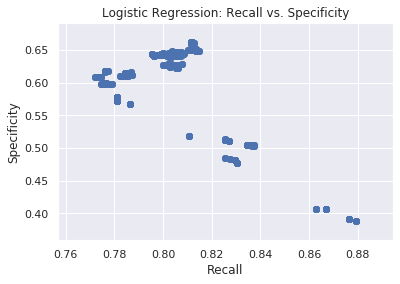

In [485]:
plt.scatter(lr_results['Recall'],lr_results['Specificity'])
plt.ylabel('Specificity')
plt.xlabel('Recall')
plt.title("Logistic Regression: Recall vs. Specificity")
plt.show()

In [544]:
#calculate test set results after picking the best model on validation result
print("best gridsearch model from validation was:")
bestmodel=lr_results.sort_values(by=[sort_metric],axis=0,ascending=False).head(1)
display(bestmodel)

allmodel_df = allmodel_df.append(pd.Series([bestmodel.iloc[0]['Model Type'],bestmodel.iloc[0]['Accuracy'],bestmodel.iloc[0]['F1'],\
        bestmodel.iloc[0]['AUC'],bestmodel.iloc[0]['Log Loss'],bestmodel.iloc[0]['Precision'],\
        bestmodel.iloc[0]['Recall'],bestmodel.iloc[0]['Specificity']],index=allmodel_df.columns),ignore_index=True)

best gridsearch model from validation was:


,Model Type,penalty,tol,c,fit_intercept,solver,max_iter,warm_start,n_jobs,l1_ratio,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
521,Logistic Regression,l1,0.01,10.0,True,saga,300,True,None,None,0.745628,0.745628,0.823666,0.510766,0.750467,0.811523,0.66286


In [487]:
#lr_results.to_csv("logisticreg_kfold_results_final"+save_version, index = False)

#### Random Forest

In [545]:
#Create Baseline
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rf_baseline_df = pd.DataFrame(columns=['Model Type','num estimators','max depth','min samples split',\
                    'min samples leaf','max features','max leaf nodes','Accuracy','F1','AUC','Log Loss',\
                                       'Precision','Recall','Specificity'])
rf_baseline_df = sklearn_gridsearch_cv_wseeding(rfc,'Random Forest',['default','default','default','default',\
                                                            'default','default'],rf_baseline_df,'train')

allmodel_baseline_df = allmodel_baseline_df.append(pd.Series([rf_baseline_df.iloc[0]['Model Type'],rf_baseline_df.iloc[0]['Accuracy'],rf_baseline_df.iloc[0]['F1'],\
        rf_baseline_df.iloc[0]['AUC'],rf_baseline_df.iloc[0]['Log Loss'],rf_baseline_df.iloc[0]['Precision'],\
        rf_baseline_df.iloc[0]['Recall'],rf_baseline_df.iloc[0]['Specificity']],index=allmodel_baseline_df.columns),ignore_index=True)

rf_baseline_noFE = pd.DataFrame(columns=['Model Type','num estimators','max depth','min samples split',\
                    'min samples leaf','max features','max leaf nodes','Accuracy','F1','AUC','Log Loss','Precision','Recall','Specificity'])
rf_baseline_noFE = sklearn_gridsearch_cv_wseeding(rfc,'Random  Forest',['default','default','default','default','default','default'], rf_baseline_noFE,'noFE')
print("no feature engineering baseline results:")
display(rf_baseline_noFE)

allmodel_baseline_noFE = allmodel_baseline_noFE.append(pd.Series([rf_baseline_noFE.iloc[0]['Model Type'],rf_baseline_noFE.iloc[0]['Accuracy'],rf_baseline_noFE.iloc[0]['F1'],\
        rf_baseline_noFE.iloc[0]['AUC'],rf_baseline_noFE.iloc[0]['Log Loss'],rf_baseline_noFE.iloc[0]['Precision'],\
        rf_baseline_noFE.iloc[0]['Recall'],rf_baseline_noFE.iloc[0]['Specificity']],index=allmodel_baseline_noFE.columns),ignore_index=True)


print("with feature engineering baseline results:")
display(rf_baseline_df)

no feature engineering baseline results:


,Model Type,num estimators,max depth,min samples split,min samples leaf,max features,max leaf nodes,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
0,Random Forest,default,default,default,default,default,default,0.774906,0.774906,0.852813,0.92338,0.801758,0.79058,0.755902


with feature engineering baseline results:


,Model Type,num estimators,max depth,min samples split,min samples leaf,max features,max leaf nodes,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
0,Random Forest,default,default,default,default,default,default,0.793564,0.793564,0.876775,0.704188,0.827111,0.794457,0.792574


In [519]:
#check the feature importances
rfc.fit(X_train_cv,y_train_cv)
feat_imp = list(zip(modeling_data.columns.tolist(),rfc.feature_importances_.tolist()))
feat_imp_df = pd.DataFrame(feat_imp, columns=['Column','Feature Importance'])
feat_imp_df.sort_values(by=['Feature Importance'],axis=0,ascending=False).head(10)

,Column,Feature Importance
6,lease_length,0.055588
0,StartingPerSqFt_USD,0.051992
1,UnitArea,0.039670
8,NumericFloor,0.039391
7,sq_foot_percent_change,0.035357
2,MonthsFreeRent,0.034712
17,simult_months,0.034690
14,hist_months,0.033940
146,Reason_6.0,0.029311
15,hist_usdSpend,0.028764


In [520]:
#Test performance with top N Features
feat_imp_df_sorted = feat_imp_df.sort_values(by=['Feature Importance'],axis=0,ascending=False)
topN_results = pd.DataFrame(columns=['N','Specificity','Recall'])

for i in range(1,len(weights_df_sorted)+1):
    train_data = X_train_cv.copy()
    topN_columns = weights_df_sorted.iloc[0:i]['Column'].tolist()
    diff = list(set(X_train_cv.columns.tolist()) - set(topN_columns))
    train_data = train_data.drop(diff, axis=1)
    rfc = RandomForestClassifier(random_state=42)
    result = sklearn_gridsearch_cv_topN(rfc, [], train_data)[5:7]
    result_list = [int(i), result[1], result[0]]
    topN_results.loc[len( topN_results)]=result_list

print('Top N Feature Count was:')
topN_results.sort_values(by=['Specificity'],axis=0,ascending=False).head(1)

Top N Feature Count was:


,N,Specificity,Recall
242,243.0,0.813649,0.802784


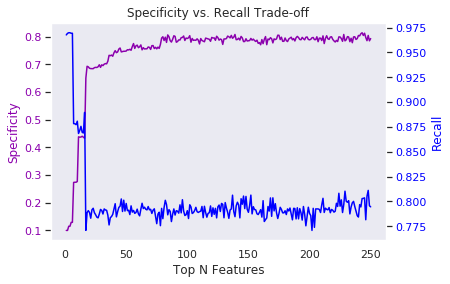

In [521]:
fig, ax1 = plt.subplots()
plt.title('Specificity vs. Recall Trade-off')

color = '#8B00AD'
ax1.set_xlabel('Top N Features')
ax1.set_ylabel('Specificity', color=color)
ax1.plot(topN_results['N'].tolist(), topN_results['Specificity'].tolist(),color=color,label='Specificity')
ax1.tick_params(axis='y',labelcolor=color)
ax1.grid(False)

ax2 = ax1.twinx()
color2 = 'blue'
ax2.set_ylabel('Recall', color=color2)  # we already handled the x-label with ax1
ax2.plot(topN_results['N'].tolist(), topN_results['Recall'].tolist(),color=color2,label='Recall')
ax2.tick_params(axis='y',labelcolor=color2)
ax2.grid(False)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

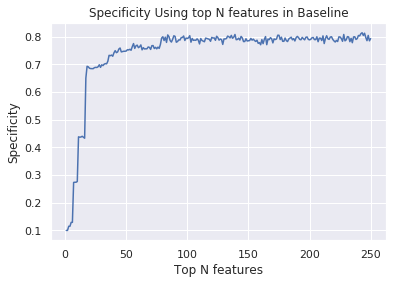

In [522]:
plt.plot(topN_results['N'].tolist(), topN_results['Specificity'].tolist())
#plt.plot(topN_results['N'].tolist(), topN_results['Recall'].tolist())
plt.title('Specificity Using top N features in Baseline')
plt.xlabel('Top N features')
plt.ylabel('Specificity')
plt.show

In [195]:
#create dataframe to store results from grid search
rf_results = pd.DataFrame(columns=['Model Type','num estimators','max depth','min samples split','min samples leaf',\
                'max features','max leaf nodes','Accuracy','F1','AUC','Log Loss','Precision','Recall','Specificity'])

In [4]:
#read in results if you don't want to train or rerun anything
rf_results = pd.read_csv("randforest_kfold_results_finalfixed_categorical_SL") #randforest_kfold_results_final

In [122]:
# parallelized version of Random Forest
from sklearn.ensemble import RandomForestClassifier

#Use data for top N features only for best performance
#topNnum=28
#train_data = X_train_cv.copy()
#topN_columns = feat_imp_df_sorted.iloc[0:topNnum]['Column'].tolist()
#diff = list(set(X_train_cv.columns.tolist()) - set(topN_columns))
#train_data = train_data.drop(diff, axis=1)

n_estimators = [6,8,10,12,14,40,70,100] 
max_depth = [None,30,40,50]
min_samples_split = [2,10,50] 
min_samples_leaf = [1,5,10] 
max_features = [None,'auto',20, 30] 
max_leaf_nodes = [None,50,100]

param_grid = list(itertools.product(n_estimators,criterion,max_depth,min_samples_split,min_samples_leaf,\
                                                    max_features,max_leaf_nodes))
results_list = []

def rfc_loop(params):
    
    rfc = RandomForestClassifier(n_estimators=params[0],max_depth=params[1],min_samples_split=params[2],\
        min_samples_leaf=params[3],max_features=params[4],max_leaf_nodes=params[5],random_state=42)
    
    return sklearn_gridsearch_cv_wseeding_parallel(rfc,'Random Forest',list(params),'train')
    
results_list.append(Parallel(n_jobs=-1)(delayed(rfc_loop)(param) for param in param_grid))

for row in results_list[0]:
    rf_results.loc[len(rf_results)]=row

TypeError: '<' not supported between instances of 'float' and 'NoneType'

In [7]:
#now print our results UPDATED
rf_results.sort_values(by=[sort_metric],axis=0,ascending=False).head(5)

,Model Type,num estimators,max depth,min samples split,min samples leaf,max features,max leaf nodes,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
12,Random Forest,8,NaN,2,1,NaN,NaN,0.795864,0.795864,0.880725,1.069673,0.850642,0.767472,0.831537
484,Random Forest,8,NaN,2,1,NaN,NaN,0.795864,0.795864,0.880725,1.069673,0.850642,0.767472,0.831537
808,Random Forest,8,50.0,2,1,NaN,NaN,0.795864,0.795864,0.880725,1.069673,0.850642,0.767472,0.831537
700,Random Forest,8,40.0,2,1,NaN,NaN,0.795864,0.795864,0.880725,1.069673,0.850642,0.767472,0.831537
15,Random Forest,8,50.0,2,1,NaN,NaN,0.795864,0.795864,0.880725,1.069673,0.850642,0.767472,0.831537


In [14]:
rf_results.loc[32]

Model Type           Random Forest
num estimators                  40
max depth                      NaN
min samples split                2
min samples leaf                 1
max features                   NaN
max leaf nodes                 NaN
Accuracy                  0.817685
F1                        0.817685
AUC                       0.900712
Log Loss                  0.522799
Precision                 0.852573
Recall                    0.812552
Specificity               0.824441
Name: 32, dtype: object

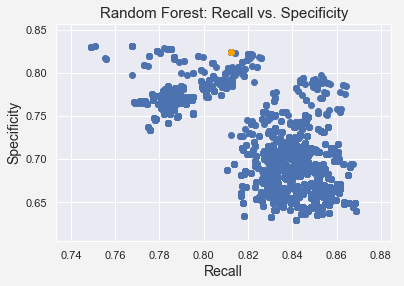

In [15]:
#plot recall vs. specificity

fig = plt.figure()
fig.patch.set_facecolor('#f3f3f3')

plt.scatter(rf_results['Recall'],rf_results['Specificity'])
plt.scatter(0.812552, 0.824441, color = 'orange')
plt.ylabel('Specificity',fontsize=14)
plt.xlabel('Recall',fontsize=14)
plt.title("Random Forest: Recall vs. Specificity",fontsize=15)
plt.show()

In [572]:
#now save our results, leave commented out as we don't want to overwrite existing data
#rf_results.to_csv("randforest_kfold_results_final"+save_version, index = False)

In [75]:
#calculate test set results after picking the best model on validation result
print("best gridsearch model from validation was:")
bestmodel=rf_results.loc[32].to_frame().T    #use this in future for picking top metric:
bestmodel = rf_results.loc[32].to_frame().T
bestmodel_display = bestmodel.drop(columns=['F1','AUC','Log Loss','Precision']).round(3)
bestmodel_display['max features'] = None
bestmodel_display['max leaf nodes'] = None
bestmodel_display['max depth'] = None
display(bestmodel_display)

allmodel_df = allmodel_df.append(pd.Series([bestmodel.iloc[0]['Model Type'],bestmodel.iloc[0]['Accuracy'],bestmodel.iloc[0]['F1'],\
        bestmodel.iloc[0]['AUC'],bestmodel.iloc[0]['Log Loss'],bestmodel.iloc[0]['Precision'],\
        bestmodel.iloc[0]['Recall'],bestmodel.iloc[0]['Specificity']],index=allmodel_df.columns),ignore_index=True)

best gridsearch model from validation was:


,Model Type,num estimators,max depth,min samples split,min samples leaf,max features,max leaf nodes,Accuracy,Recall,Specificity
32,Random Forest,40,None,2,1,None,None,0.817685,0.812552,0.824441


### Neural Net

In [547]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp_baseline_df = pd.DataFrame(columns=['Model Type','hidden layer sizes','activation','alpha','batch size',\
        'learning rate','learning rate init','max iter','early stopping','Accuracy','F1','AUC','Log Loss',\
                                                                                'Precision','Recall','Specificity'])

mlp_baseline_df = sklearn_gridsearch_cv_wseeding(mlp,'Neural Net',['default','default','default','default',\
                                                'default','default','default','default'],mlp_baseline_df,'train')

mlp_baseline_noFE = pd.DataFrame(columns=['Model Type','hidden layer sizes','activation','alpha','batch size',\
        'learning rate','learning rate init','max iter','early stopping','Accuracy','F1','AUC','Log Loss','Precision','Recall','Specificity'])
mlp_baseline_noFE = sklearn_gridsearch_cv_wseeding(mlp,'Neural Net',['default','default','default','default','default','default','default','default'], mlp_baseline_noFE,'noFE')

print("no feature engineering baseline results:")
display(mlp_baseline_noFE)

allmodel_baseline_noFE = allmodel_baseline_noFE.append(pd.Series([mlp_baseline_noFE.iloc[0]['Model Type'],mlp_baseline_noFE.iloc[0]['Accuracy'],mlp_baseline_noFE.iloc[0]['F1'],\
        mlp_baseline_noFE.iloc[0]['AUC'],mlp_baseline_noFE.iloc[0]['Log Loss'],mlp_baseline_noFE.iloc[0]['Precision'],\
        mlp_baseline_noFE.iloc[0]['Recall'],mlp_baseline_noFE.iloc[0]['Specificity']],index=allmodel_baseline_noFE.columns),ignore_index=True)

print("with feature engineering baseline results:")
display(mlp_baseline_df)

allmodel_baseline_df = allmodel_baseline_df.append(pd.Series([mlp_baseline_df.iloc[0]['Model Type'],mlp_baseline_df.iloc[0]['Accuracy'],mlp_baseline_df.iloc[0]['F1'],\
        mlp_baseline_df.iloc[0]['AUC'],mlp_baseline_df.iloc[0]['Log Loss'],mlp_baseline_df.iloc[0]['Precision'],\
        mlp_baseline_df.iloc[0]['Recall'],mlp_baseline_df.iloc[0]['Specificity']],index=allmodel_baseline_df.columns),ignore_index=True)

no feature engineering baseline results:


,Model Type,hidden layer sizes,activation,alpha,batch size,learning rate,learning rate init,max iter,early stopping,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
0,Neural Net,default,default,default,default,default,default,default,default,0.77548,0.77548,0.855952,0.683616,0.799148,0.796385,0.748986


with feature engineering baseline results:


,Model Type,hidden layer sizes,activation,alpha,batch size,learning rate,learning rate init,max iter,early stopping,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
0,Neural Net,default,default,default,default,default,default,default,default,0.791558,0.791558,0.863646,0.667282,0.811887,0.813913,0.764515


In [497]:
#check the feature importances
mlp.fit(X_train,y_train)
feat_imp = list(zip(modeling_data.columns.tolist(),rfc.feature_importances_.tolist()))
feat_imp_df = pd.DataFrame(feat_imp, columns=['Column','Feature Importance'])
feat_imp_df.sort_values(by=['Feature Importance'],axis=0,ascending=False).head(10)

,Column,Feature Importance
1,UnitArea,0.091170
0,StartingPerSqFt_USD,0.079961
2,MonthsFreeRent,0.066777
3,NumPriceChanges,0.041120
4,NumFreeRentPeriods,0.031552
128,UnitType_6.0,0.027480
12,lat_lon_z,0.024369
18,simult_usdSpend,0.023174
23,Reason_hasnulls,0.018477
96,GreaterCity_4.0,0.018176


In [498]:
#Test performance with top N Features
feat_imp_df_sorted = feat_imp_df.sort_values(by=['Feature Importance'],axis=0,ascending=False)
topN_results = pd.DataFrame(columns=['N','Specificity','Recall'])

for i in range(1,len(weights_df_sorted)+1):
    train_data = X_train_cv.copy()
    topN_columns = weights_df_sorted.iloc[0:i]['Column'].tolist()
    diff = list(set(X_train_cv.columns.tolist()) - set(topN_columns))
    train_data = train_data.drop(diff, axis=1)
    mlp = MLPClassifier(random_state=42)
    result = sklearn_gridsearch_cv_topN(mlp, [], train_data)[5:7]
    result_list = [int(i), result[1], result[0]]
    topN_results.loc[len( topN_results)]=result_list

print('Top N Feature Count was:')
topN_results.sort_values(by=['Specificity'],axis=0,ascending=False).head(1)

Top N Feature Count was:


,N,Specificity,Recall
247,248.0,0.773683,0.812374


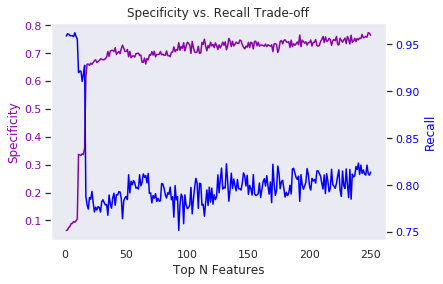

In [499]:
fig, ax1 = plt.subplots()
plt.title('Specificity vs. Recall Trade-off')

color = '#8B00AD'
ax1.set_xlabel('Top N Features')
ax1.set_ylabel('Specificity', color=color)
ax1.plot(topN_results['N'].tolist(), topN_results['Specificity'].tolist(),color=color,label='Specificity')
ax1.tick_params(axis='y',labelcolor=color)
ax1.grid(False)

ax2 = ax1.twinx()
color2 = 'blue'
ax2.set_ylabel('Recall', color=color2)  # we already handled the x-label with ax1
ax2.plot(topN_results['N'].tolist(), topN_results['Recall'].tolist(),color=color2,label='Recall')
ax2.tick_params(axis='y',labelcolor=color2)
ax2.grid(False)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

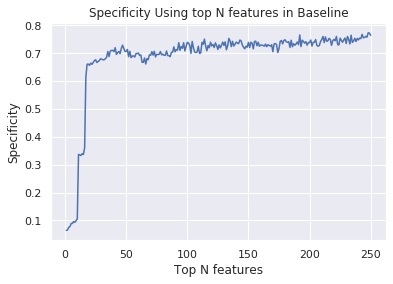

In [500]:
plt.plot(topN_results['N'].tolist(), topN_results['Specificity'].tolist())
#plt.plot(topN_results['N'].tolist(), topN_results['Recall'].tolist())
plt.title('Specificity Using top N features in Baseline')
plt.xlabel('Top N features')
plt.ylabel('Specificity')
plt.show

In [490]:
#create dataframe to store results
mlp_results = pd.DataFrame(columns=['Model Type','hidden layer sizes','activation','alpha','batch size',\
        'learning rate','learning rate init','max iter','early stopping','Accuracy','F1','AUC','Log Loss',\
                                                'Precision','Recall','Specificity'])

In [491]:
#read in results if you don't want to train or rerun anything
#mlp_results = pd.read_csv("neuralnet_kfold_results_final")

In [492]:
from sklearn.neural_network import MLPClassifier

hidden_layer_sizes=[(50,),(100,),(200,),(300,)]
activation = ['tanh','relu']
alpha = [.01,.001,.0001]
batch_size = ['auto',50,100]
learning_rate = ['constant']
learning_rate_init = [.01,.001,.0001]
max_iter = [100,200,300]
early_stopping = [False,True]

param_grid = list(itertools.product(hidden_layer_sizes,activation,alpha,batch_size,learning_rate,\
                        learning_rate_init,max_iter,early_stopping))
results_list = []

#parallelized version of neural net
def mlp_loop(params):
    
    mlp = MLPClassifier(hidden_layer_sizes=params[0],activation=params[1],alpha=params[2],batch_size=params[3],\
            learning_rate=params[4],learning_rate_init=params[5],max_iter=params[6],\
            early_stopping=params[7],random_state=42)

    return sklearn_gridsearch_cv_wseeding_parallel(mlp,'Neural Net',list(params),'noFE')
    
results_list.append(Parallel(n_jobs=-1)(delayed(mlp_loop)(param) for param in param_grid))

for row in results_list[0]:
    mlp_results.loc[len(mlp_results)]=row

In [548]:
#now print our results
mlp_results.sort_values(by=[sort_metric],axis=0,ascending=False).head(10)

,Model Type,hidden layer sizes,activation,alpha,batch size,learning rate,learning rate init,max iter,early stopping,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
672,Neural Net,"(200,)",tanh,0.0100,50,constant,0.001,100,False,0.770895,0.770895,0.850082,0.496756,0.817657,0.755438,0.789174
726,Neural Net,"(200,)",tanh,0.0010,50,constant,0.001,100,False,0.768023,0.768023,0.852123,0.515864,0.813344,0.755061,0.783379
780,Neural Net,"(200,)",tanh,0.0001,50,constant,0.001,100,False,0.766874,0.766874,0.849675,0.536064,0.812731,0.753587,0.782824
834,Neural Net,"(200,)",relu,0.0100,50,constant,0.001,100,False,0.784094,0.784094,0.863589,0.600494,0.817402,0.787311,0.779074
888,Neural Net,"(200,)",relu,0.0010,50,constant,0.001,100,False,0.780937,0.780937,0.861295,0.689030,0.816085,0.781937,0.778337
738,Neural Net,"(200,)",tanh,0.0010,100,constant,0.010,100,False,0.776921,0.776921,0.853493,0.835773,0.814392,0.774970,0.777587
684,Neural Net,"(200,)",tanh,0.0100,100,constant,0.010,100,False,0.768019,0.768019,0.849964,0.728621,0.810407,0.759637,0.777194
1225,Neural Net,"(300,)",relu,0.0010,100,constant,0.010,100,True,0.771466,0.771466,0.852870,0.613936,0.810807,0.768124,0.776399
1227,Neural Net,"(300,)",relu,0.0010,100,constant,0.010,200,True,0.771466,0.771466,0.852870,0.613936,0.810807,0.768124,0.776399
1229,Neural Net,"(300,)",relu,0.0010,100,constant,0.010,300,True,0.771466,0.771466,0.852870,0.613936,0.810807,0.768124,0.776399


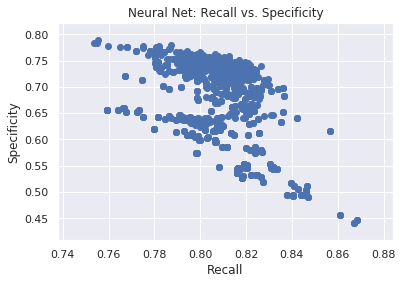

In [532]:
#plot recall vs. specificity
plt.scatter(mlp_results['Recall'],mlp_results['Specificity'])
plt.ylabel('Specificity')
plt.xlabel('Recall')
plt.title("Neural Net: Recall vs. Specificity")
plt.show()

In [533]:
#now save our results, leave commented out as we don't want to overwrite existing data
mlp_results.to_csv("neuralnet_kfold_results_final"+save_version, index = False)

In [549]:
# WRONG WRONG REPLACE

#calculate test set results after picking the best model on validation result
print("best gridsearch model was:")
bestmodel=mlp_results.loc[834].to_frame().T    #use this in future for picking top metric: mlp_results.sort_values(by=[sort_metric],axis=0,ascending=False).head(1)
display(bestmodel)

allmodel_df = allmodel_df.append(pd.Series([bestmodel.iloc[0]['Model Type'],bestmodel.iloc[0]['Accuracy'],bestmodel.iloc[0]['F1'],\
        bestmodel.iloc[0]['AUC'],bestmodel.iloc[0]['Log Loss'],bestmodel.iloc[0]['Precision'],\
        bestmodel.iloc[0]['Recall'],bestmodel.iloc[0]['Specificity']],index=allmodel_df.columns),ignore_index=True)

best gridsearch model was:


,Model Type,hidden layer sizes,activation,alpha,batch size,learning rate,learning rate init,max iter,early stopping,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
834,Neural Net,"(200,)",relu,0.01,50,constant,0.001,100,False,0.784094,0.784094,0.863589,0.600494,0.817402,0.787311,0.779074


### AdaBoost

In [550]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(random_state=42)
abc_baseline_df = pd.DataFrame(columns=['Model Type','num estimators','learning rate','algorithm',\
                                            'Accuracy','F1','AUC','Log Loss','Precision','Recall','Specificity'])
abc_baseline_df = sklearn_gridsearch_cv_wseeding(abc,'AdaBoost',['default','default','default'],\
                                                             abc_baseline_df,'train')

abc_baseline_noFE = pd.DataFrame(columns=['Model Type','num estimators','learning rate','algorithm',\
        'Accuracy','F1','AUC','Log Loss','Precision','Recall','Specificity'])
abc_baseline_noFE = sklearn_gridsearch_cv_wseeding(abc,'AdaBoost',['default','default','default'], abc_baseline_noFE,'noFE')

print("no feature engineering baseline results:")
display(abc_baseline_noFE)

allmodel_baseline_noFE = allmodel_baseline_noFE.append(pd.Series([abc_baseline_noFE.iloc[0]['Model Type'],abc_baseline_noFE.iloc[0]['Accuracy'],abc_baseline_noFE.iloc[0]['F1'],\
        abc_baseline_noFE.iloc[0]['AUC'],abc_baseline_noFE.iloc[0]['Log Loss'],abc_baseline_noFE.iloc[0]['Precision'],\
        abc_baseline_noFE.iloc[0]['Recall'],abc_baseline_noFE.iloc[0]['Specificity']],index=allmodel_baseline_noFE.columns),ignore_index=True)

print("with feature engineering baseline results:")
display(abc_baseline_df)

allmodel_baseline_df = allmodel_baseline_df.append(pd.Series([abc_baseline_df.iloc[0]['Model Type'],abc_baseline_df.iloc[0]['Accuracy'],abc_baseline_df.iloc[0]['F1'],\
        abc_baseline_df.iloc[0]['AUC'],abc_baseline_df.iloc[0]['Log Loss'],abc_baseline_df.iloc[0]['Precision'],\
        abc_baseline_df.iloc[0]['Recall'],abc_baseline_df.iloc[0]['Specificity']],index=allmodel_baseline_df.columns),ignore_index=True)

no feature engineering baseline results:


,Model Type,num estimators,learning rate,algorithm,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
0,AdaBoost,default,default,default,0.719214,0.719214,0.793309,0.673875,0.730776,0.782704,0.639938


with feature engineering baseline results:


,Model Type,num estimators,learning rate,algorithm,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
0,AdaBoost,default,default,default,0.743907,0.743907,0.823963,0.672733,0.75154,0.804794,0.668116


In [476]:
#check the feature importances
abc.fit(X_train_cv,y_train_cv)
feat_imp = list(zip(modeling_data.columns.tolist(),rfc.feature_importances_.tolist()))
feat_imp_df = pd.DataFrame(feat_imp, columns=['Column','Feature Importance'])
feat_imp_df.sort_values(by=['Feature Importance'],axis=0,ascending=False).head(10)

,Column,Feature Importance
1,UnitArea,0.091170
0,StartingPerSqFt_USD,0.079961
2,MonthsFreeRent,0.066777
3,NumPriceChanges,0.041120
4,NumFreeRentPeriods,0.031552
128,UnitType_6.0,0.027480
12,lat_lon_z,0.024369
18,simult_usdSpend,0.023174
23,Reason_hasnulls,0.018477
96,GreaterCity_4.0,0.018176


In [477]:
#Test performance with top N Features
feat_imp_df_sorted = feat_imp_df.sort_values(by=['Feature Importance'],axis=0,ascending=False)
topN_results = pd.DataFrame(columns=['N','Specificity','Recall'])

for i in range(1,len(weights_df_sorted)+1):
    train_data = X_train_cv.copy()
    topN_columns = weights_df_sorted.iloc[0:i]['Column'].tolist()
    diff = list(set(X_train_cv.columns.tolist()) - set(topN_columns))
    train_data = train_data.drop(diff, axis=1)
    abc = AdaBoostClassifier(random_state=42)
    result = sklearn_gridsearch_cv_topN(abc, [], train_data)[5:7]
    result_list = [int(i), result[1], result[0]]
    topN_results.loc[len( topN_results)]=result_list

print('Top N Feature Count was:')
topN_results.sort_values(by=['Specificity'],axis=0,ascending=False).head(1)

Top N Feature Count was:


,N,Specificity,Recall
249,250.0,0.668116,0.804794


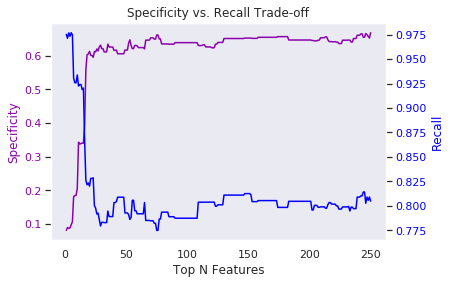

In [478]:
fig, ax1 = plt.subplots()
plt.title('Specificity vs. Recall Trade-off')

color = '#8B00AD'
ax1.set_xlabel('Top N Features')
ax1.set_ylabel('Specificity', color=color)
ax1.plot(topN_results['N'].tolist(), topN_results['Specificity'].tolist(),color=color,label='Specificity')
ax1.tick_params(axis='y',labelcolor=color)
ax1.grid(False)

ax2 = ax1.twinx()
color2 = 'blue'
ax2.set_ylabel('Recall', color=color2)  # we already handled the x-label with ax1
ax2.plot(topN_results['N'].tolist(), topN_results['Recall'].tolist(),color=color2,label='Recall')
ax2.tick_params(axis='y',labelcolor=color2)
ax2.grid(False)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

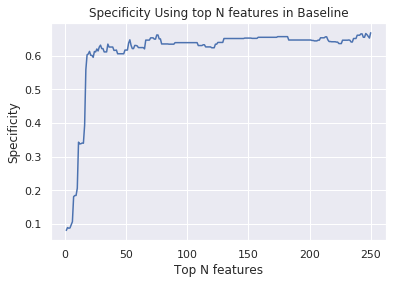

In [479]:
plt.plot(topN_results['N'].tolist(), topN_results['Specificity'].tolist())
#plt.plot(topN_results['N'].tolist(), topN_results['Recall'].tolist())
plt.title('Specificity Using top N features in Baseline')
plt.xlabel('Top N features')
plt.ylabel('Specificity')
plt.show

In [480]:
#create dataframe to store results
abc_results = pd.DataFrame(columns=['Model Type','num estimators','learning rate','algorithm','Accuracy','F1',\
                                                            'AUC','Log Loss','Precision','Recall','Specificity'])
abc_results

,Model Type,num estimators,learning rate,algorithm,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity


In [481]:
#read in results if you don't want to train or rerun anything
#abc_results = pd.read_csv("adaboost_kfold_results_final")

In [482]:
from sklearn.ensemble import AdaBoostClassifier

n_estimators = [100,200,300,350,400,450,500,550,600]
learning_rate = [.7,.75,.8,.85,.9,.95,1]
algorithm = ['SAMME.R']
param_grid = list(itertools.product(n_estimators,learning_rate,algorithm))
results_list = []

#parallelized version of adaboost
def abc_loop(params):
    
    abc = AdaBoostClassifier(n_estimators=params[0],learning_rate=params[1],algorithm=params[2],random_state=42)

    return sklearn_gridsearch_cv_wseeding_parallel(abc,'AdaBoost',list(params),'train')
    
results_list.append(Parallel(n_jobs=-1)(delayed(abc_loop)(param) for param in param_grid))

for row in results_list[0]:
    abc_results.loc[len(abc_results)]=row

In [536]:
#now print our results
abc_results.sort_values(by=[sort_metric],axis=0,ascending=False).head(5)

,Model Type,num estimators,learning rate,algorithm,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
62,AdaBoost,600,1.00,SAMME.R,0.765438,0.765438,0.835085,0.690091,0.778430,0.806897,0.713345
55,AdaBoost,550,1.00,SAMME.R,0.766012,0.766012,0.834952,0.689834,0.777368,0.810525,0.709973
46,AdaBoost,500,0.90,SAMME.R,0.763140,0.763140,0.833799,0.689487,0.773991,0.809456,0.704748
53,AdaBoost,550,0.90,SAMME.R,0.761993,0.761993,0.833079,0.689800,0.773523,0.807371,0.704651
61,AdaBoost,600,0.95,SAMME.R,0.761992,0.761992,0.833345,0.690066,0.772906,0.808429,0.703489


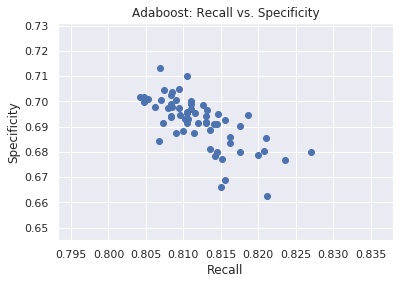

In [537]:
plt.scatter(abc_results['Recall'],abc_results['Specificity'])
plt.ylabel('Specificity')
plt.xlabel('Recall')
plt.title("Adaboost: Recall vs. Specificity")
plt.show()

In [488]:
# now save our results, leave commented out as we don't want to overwrite existing data
abc_results.to_csv("adaboost_kfold_results_final"+save_version, index = False)

In [551]:
#calculate test set results after picking the best model on gridsearch result
print("best gridsearch model was:")
bestmodel=abc_results.sort_values(by=[sort_metric],axis=0,ascending=False).head(1)
display(bestmodel)

allmodel_df = allmodel_df.append(pd.Series([bestmodel.iloc[0]['Model Type'],bestmodel.iloc[0]['Accuracy'],bestmodel.iloc[0]['F1'],\
        bestmodel.iloc[0]['AUC'],bestmodel.iloc[0]['Log Loss'],bestmodel.iloc[0]['Precision'],\
        bestmodel.iloc[0]['Recall'],bestmodel.iloc[0]['Specificity']],index=allmodel_df.columns),ignore_index=True)

best gridsearch model was:


,Model Type,num estimators,learning rate,algorithm,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
62,AdaBoost,600,1.0,SAMME.R,0.765438,0.765438,0.835085,0.690091,0.77843,0.806897,0.713345


#### Extremely Randomized Trees

In [552]:
#Create Baseline
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(random_state=42)
et_baseline_df = pd.DataFrame(columns=['Model Type','num estimators','criterion','max depth','min samples split',\
    'min samples leaf','max features','max leaf nodes','Accuracy','F1','AUC','Log Loss','Precision','Recall','Specificity'])
et_baseline_df = sklearn_gridsearch_cv_wseeding(etc,'Extra Trees',['default','default','default','default','default','default','default'],\
                                                                et_baseline_df,'train')

et_baseline_noFE = pd.DataFrame(columns=['Model Type','num estimators','criterion','max depth','min samples split',\
    'min samples leaf','max features','max leaf nodes','Accuracy','F1','AUC','Log Loss','Precision','Recall','Specificity'])
et_baseline_noFE = sklearn_gridsearch_cv_wseeding(etc,'Extra Trees',['default','default','default','default','default','default','default'], et_baseline_noFE,'noFE')

print("no feature engineering baseline results:")
display(et_baseline_noFE)

allmodel_baseline_noFE = allmodel_baseline_noFE.append(pd.Series([et_baseline_noFE.iloc[0]['Model Type'],et_baseline_noFE.iloc[0]['Accuracy'],et_baseline_noFE.iloc[0]['F1'],\
        et_baseline_noFE.iloc[0]['AUC'],et_baseline_noFE.iloc[0]['Log Loss'],et_baseline_noFE.iloc[0]['Precision'],\
        et_baseline_noFE.iloc[0]['Recall'],et_baseline_noFE.iloc[0]['Specificity']],index=allmodel_baseline_noFE.columns),ignore_index=True)

print("baseline results:")
display(et_baseline_df)

allmodel_baseline_df = allmodel_baseline_df.append(pd.Series([et_baseline_df.iloc[0]['Model Type'],et_baseline_df.iloc[0]['Accuracy'],et_baseline_df.iloc[0]['F1'],\
        et_baseline_df.iloc[0]['AUC'],et_baseline_df.iloc[0]['Log Loss'],et_baseline_df.iloc[0]['Precision'],\
        et_baseline_df.iloc[0]['Recall'],et_baseline_df.iloc[0]['Specificity']],index=allmodel_baseline_df.columns),ignore_index=True)

no feature engineering baseline results:


,Model Type,num estimators,criterion,max depth,min samples split,min samples leaf,max features,max leaf nodes,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
0,Extra Trees,default,default,default,default,default,default,default,0.778926,0.778926,0.852183,1.661925,0.809371,0.787667,0.767879


baseline results:


,Model Type,num estimators,criterion,max depth,min samples split,min samples leaf,max features,max leaf nodes,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
0,Extra Trees,default,default,default,default,default,default,default,0.804767,0.804767,0.88797,0.914159,0.833425,0.8109,0.797193


In [501]:
#check the feature importances
etc = ExtraTreesClassifier(random_state=42)
etc.fit(X_train_cv,y_train_cv)
feat_imp = list(zip(modeling_data.columns.tolist(),etc.feature_importances_.tolist()))
feat_imp_df = pd.DataFrame(feat_imp, columns=['Column','Feature Importance'])
feat_imp_df.sort_values(by=['Feature Importance'],axis=0,ascending=False).head(10)

,Column,Feature Importance
6,lease_length,0.044217
146,Reason_6.0,0.037156
17,simult_months,0.032701
8,NumericFloor,0.028781
1,UnitArea,0.026864
0,StartingPerSqFt_USD,0.026420
16,simult_count,0.026123
21,CompanySize,0.024815
2,MonthsFreeRent,0.023490
15,hist_usdSpend,0.022086


In [502]:
#Test performance with top N Features
feat_imp_df_sorted = feat_imp_df.sort_values(by=['Feature Importance'],axis=0,ascending=False)
topN_results = pd.DataFrame(columns=['N','Specificity','Recall'])

for i in range(1,len(weights_df_sorted)+1):
    train_data = X_train_cv.copy()
    topN_columns = weights_df_sorted.iloc[0:i]['Column'].tolist()
    diff = list(set(X_train_cv.columns.tolist()) - set(topN_columns))
    train_data = train_data.drop(diff, axis=1)
    etc = ExtraTreesClassifier(random_state=42)
    result = sklearn_gridsearch_cv_topN(rfc, [], train_data)[5:7]
    result_list = [int(i), result[1], result[0]]
    topN_results.loc[len( topN_results)]=result_list

print('Top N Feature Count was:')
topN_results.sort_values(by=['Specificity'],axis=0,ascending=False).head(1)

Top N Feature Count was:


,N,Specificity,Recall
242,243.0,0.813649,0.802784


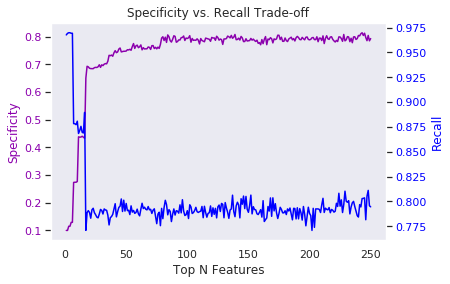

In [503]:
fig, ax1 = plt.subplots()
plt.title('Specificity vs. Recall Trade-off')

color = '#8B00AD'
ax1.set_xlabel('Top N Features')
ax1.set_ylabel('Specificity', color=color)
ax1.plot(topN_results['N'].tolist(), topN_results['Specificity'].tolist(),color=color,label='Specificity')
ax1.tick_params(axis='y',labelcolor=color)
ax1.grid(False)

ax2 = ax1.twinx()
color2 = 'blue'
ax2.set_ylabel('Recall', color=color2)  # we already handled the x-label with ax1
ax2.plot(topN_results['N'].tolist(), topN_results['Recall'].tolist(),color=color2,label='Recall')
ax2.tick_params(axis='y',labelcolor=color2)
ax2.grid(False)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

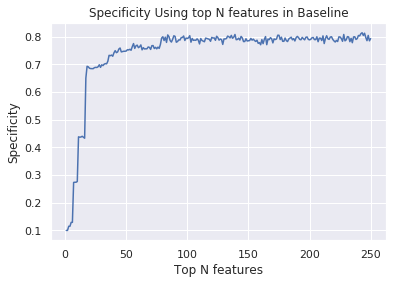

In [504]:
plt.plot(topN_results['N'].tolist(), topN_results['Specificity'].tolist())
#plt.plot(topN_results['N'].tolist(), topN_results['Recall'].tolist())
plt.title('Specificity Using top N features in Baseline')
plt.xlabel('Top N features')
plt.ylabel('Specificity')
plt.show

In [505]:
et_results = pd.DataFrame(columns=['Model Type','num estimators','criterion','max depth',\
    'min samples split','min samples leaf','max features','max leaf nodes','Accuracy','F1','AUC',\
    'Log Loss','Precision','Recall','Specificity'])

In [460]:
#read in results if you don't want to train or rerun anything
#et_results = pd.read_csv("extratree_kfold_results_final_SL")

In [512]:
from sklearn.ensemble import ExtraTreesClassifier

n_estimators = [8,9,11,12] #[5,6,7,13,14,15,10,40,70,100] #[8,9,11,12]
criterion = ['gini']#,'entropy']
max_depth = [None,50,100]
min_samples_split = [2] #[2,10,50] 
min_samples_leaf = [1] #[1,5,10] 
max_features = [None,20,25,30,35] #'auto'
max_leaf_nodes = [None] #[None,50,100] 
param_grid = list(itertools.product(n_estimators,criterion,max_depth,min_samples_split,min_samples_leaf,\
                                                                   max_features,max_leaf_nodes))
results_list = []

#parallelized version of adaboost
def etc_loop(params):
    
    etc = ExtraTreesClassifier(n_estimators=params[0],criterion=params[1],max_depth=params[2],\
        min_samples_split=params[3],min_samples_leaf=params[4],max_features=params[5],\
        max_leaf_nodes=params[6],random_state=42)
    
    return sklearn_gridsearch_cv_wseeding_parallel(etc,'Extra Trees',list(params),'train')
    
results_list.append(Parallel(n_jobs=-1)(delayed(etc_loop)(param) for param in param_grid))

for row in results_list[0]:
    et_results.loc[len(et_results)]=row

In [553]:
#now print our results
et_results.sort_values(by=[sort_metric],axis=0,ascending=False).head(5)

,Model Type,num estimators,criterion,max depth,min samples split,min samples leaf,max features,max leaf nodes,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
819,Extra Trees,6,gini,None,2,1,30,None,0.800747,0.800747,0.877334,1.643900,0.848181,0.780947,0.825471
1089,Extra Trees,6,gini,100,2,1,30,None,0.800747,0.800747,0.877334,1.643900,0.848181,0.780947,0.825471
954,Extra Trees,6,gini,50,2,1,30,None,0.797878,0.797878,0.877451,1.634526,0.843828,0.780309,0.819841
816,Extra Trees,6,gini,None,2,1,25,None,0.791554,0.791554,0.870756,1.639396,0.841372,0.769967,0.817907
1086,Extra Trees,6,gini,100,2,1,25,None,0.791554,0.791554,0.870756,1.639396,0.841372,0.769967,0.817907


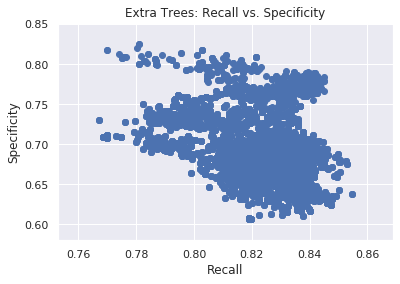

In [514]:
plt.scatter(et_results['Recall'],et_results['Specificity'])
plt.ylabel('Specificity')
plt.xlabel('Recall')
plt.title("Extra Trees: Recall vs. Specificity")
plt.show()

In [515]:
# now save it, but commented out bc we don't want to overwrite it
et_results.to_csv("extratree_kfold_results_final"+save_version, index = False)

In [554]:
#calculate test set results after picking the best model on gridsearch result
print("best gridsearch model was:")
bestmodel=et_results.loc[4869].to_frame().T #use in future as it is for automated run et_results.sort_values(by=[sort_metric],axis=0,ascending=False).head(1)
display(bestmodel)

allmodel_df = allmodel_df.append(pd.Series([bestmodel.iloc[0]['Model Type'],bestmodel.iloc[0]['Accuracy'],bestmodel.iloc[0]['F1'],\
        bestmodel.iloc[0]['AUC'],bestmodel.iloc[0]['Log Loss'],bestmodel.iloc[0]['Precision'],\
        bestmodel.iloc[0]['Recall'],bestmodel.iloc[0]['Specificity']],index=allmodel_df.columns),ignore_index=True)

best gridsearch model was:


,Model Type,num estimators,criterion,max depth,min samples split,min samples leaf,max features,max leaf nodes,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
4869,Extra Trees,10,gini,None,2,1,30,None,0.811368,0.811368,0.890133,1.05704,0.843516,0.811044,0.811705


### Aggregate Results

In [78]:
#save results
#allmodel_baseline_noFE.to_csv('allmodel_baseline_noFE',index=False)
#allmodel_baseline_df.to_csv('allmodel_baseline_df',index=False)
#allmodel_df.to_csv('allmodel_df',index=False)

#read results
import pandas as pd
sort_metric = 'Specificity'
allmodel_baseline_noFE = pd.read_csv('allmodel_baseline_noFE')
allmodel_baseline_df = pd.read_csv('allmodel_baseline_df')
allmodel_df = pd.read_csv('allmodel_df')

In [79]:
#show baseline models before feat engineering
print("Baseline results before feature engineering were:")
allmodel_baseline_noFE.sort_values(by=[sort_metric],axis=0,ascending=False)

Baseline results before feature engineering were:


,Model Type,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
4,Extra Trees,0.778926,0.778926,0.852183,1.661925,0.809371,0.787667,0.767879
1,Random Forest,0.774906,0.774906,0.852813,0.923380,0.801758,0.790580,0.755902
2,Neural Net,0.775480,0.775480,0.855952,0.683616,0.799148,0.796385,0.748986
3,AdaBoost,0.719214,0.719214,0.793309,0.673875,0.730776,0.782704,0.639938
0,Logistic Regression,0.725533,0.725533,0.802196,0.534614,0.732794,0.796034,0.637094


In [80]:
#show baseline models after feat engineering
print("Baseline results after feature engineering were:")
allmodel_baseline_df.sort_values(by=[sort_metric],axis=0,ascending=False)

Baseline results after feature engineering were:


,Model Type,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
4,Extra Trees,0.804767,0.804767,0.887970,0.914159,0.833425,0.810900,0.797193
1,Random Forest,0.793564,0.793564,0.876775,0.704188,0.827111,0.794457,0.792574
2,Neural Net,0.791558,0.791558,0.863646,0.667282,0.811887,0.813913,0.764515
3,AdaBoost,0.743907,0.743907,0.823963,0.672733,0.751540,0.804794,0.668116
0,Logistic Regression,0.731845,0.731845,0.810240,0.526696,0.737118,0.803211,0.642028


In [81]:
#create a new DF to display best result achieved across each model type
allmodel_df = allmodel_df.sort_values(by=[sort_metric],axis=0,ascending=False)
print("Results after tuning hyperparameters were:")
allmodel_df

# now save it, but commented out bc we don't want to overwrite it
#allmodel_df.to_csv("model_results", index = False)

Results after tuning hyperparameters were:


,Model Type,Accuracy,F1,AUC,Log Loss,Precision,Recall,Specificity
1,Random Forest,0.817685,0.817685,0.900712,0.522799,0.852573,0.812552,0.824441
4,Extra Trees,0.811368,0.811368,0.890133,1.057040,0.843516,0.811044,0.811705
2,Neural Net,0.784094,0.784094,0.863589,0.600494,0.817402,0.787311,0.779074
3,AdaBoost,0.765438,0.765438,0.835085,0.690091,0.778430,0.806897,0.713345
0,Logistic Regression,0.745628,0.745628,0.823666,0.510766,0.750467,0.811523,0.662860


In [82]:
# Summarize Recall & Specificity baseline vs. optimized params

#sort on index so they have the same ordering
allmodel_baseline_df = allmodel_baseline_df.sort_index(axis=0)
allmodel_df = allmodel_df.sort_index(axis=0)
allmodel_baseline_noFE = allmodel_baseline_noFE.sort_index(axis=0)

improvement = pd.DataFrame(columns=['Model Type','Base noFE Spec','Base w/FE Spec','Tune Spec','FE % Imp Spec','Tune % Imp Spec','Base noFE Rec','Base w/FE Rec','Tune Rec','FE % Imp Rec','Tune % Imp Rec'])

model_type= list(allmodel_baseline_df['Model Type'])
baseline_noFE_recall = list(allmodel_baseline_noFE['Recall'])
baseline_noFE_specificity =  list(allmodel_baseline_noFE['Specificity'])
baseline_recall = list(allmodel_baseline_df['Recall'])
baseline_specificity = list(allmodel_baseline_df['Specificity'])
opt_recall = list(allmodel_df['Recall'])
opt_specificity = list(allmodel_df['Specificity'])
improvement['Model Type'] = model_type
improvement['Base noFE Spec'] = baseline_noFE_specificity
improvement['Base noFE Rec'] = baseline_noFE_recall
improvement['Base w/FE Rec'] = baseline_recall
improvement['Base w/FE Spec'] = baseline_specificity
improvement['Tune Rec'] = opt_recall
improvement['Tune Spec'] = opt_specificity
improvement['FE % Imp Spec'] = (improvement['Base w/FE Spec'] - improvement['Base noFE Spec'])/improvement['Base noFE Spec']
improvement['FE % Imp Rec'] = (improvement['Base w/FE Rec'] - improvement['Base noFE Rec'])/improvement['Base noFE Rec']
improvement['Tune % Imp Spec'] = (improvement['Tune Spec'] - improvement['Base w/FE Spec'])/improvement['Base w/FE Spec']
improvement['Tune % Imp Rec'] = (improvement['Tune Rec'] - improvement['Base w/FE Rec'])/improvement['Base w/FE Rec']

improvement = improvement.sort_values(by=['Tune Spec'],axis=0,ascending=False)
improvement = improvement.round(3)
improvement

,Model Type,Base noFE Spec,Base w/FE Spec,Tune Spec,FE % Imp Spec,Tune % Imp Spec,Base noFE Rec,Base w/FE Rec,Tune Rec,FE % Imp Rec,Tune % Imp Rec
1,Random Forest,0.756,0.793,0.824,0.049,0.040,0.791,0.794,0.813,0.005,0.023
4,Extra Trees,0.768,0.797,0.812,0.038,0.018,0.788,0.811,0.811,0.029,0.000
2,Neural Net,0.749,0.765,0.779,0.021,0.019,0.796,0.814,0.787,0.022,-0.033
3,AdaBoost,0.640,0.668,0.713,0.044,0.068,0.783,0.805,0.807,0.028,0.003
0,Logistic Regression,0.637,0.642,0.663,0.008,0.032,0.796,0.803,0.812,0.009,0.010


In [83]:
#create copy with shorter model type names for plot legends
improvement_copy = improvement.copy()
improvement_copy.loc[0,'Model Type'] = 'LR'
improvement_copy.loc[1,'Model Type'] = 'RF'
improvement_copy.loc[2,'Model Type'] = 'NN'
improvement_copy.loc[3,'Model Type'] = 'AB'
improvement_copy.loc[4,'Model Type'] = 'ET'

In [84]:
plt.rcParams.update({'font.size': 11})

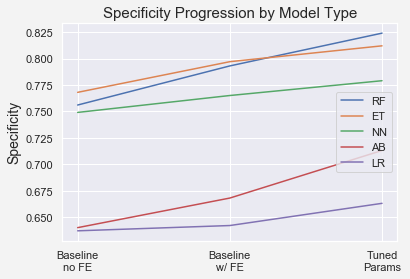

In [85]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(8,6))
fig = plt.figure()
fig.patch.set_facecolor('#f3f3f3')



for row in range(len(improvement_copy)):
    result = list(improvement_copy.iloc[row][0:4])
    plt.plot(result[1:5],label=result[0])

#set gray background
#ax = plt.gca()
#ax.set_facecolor('#f2f2f2')

# draw solid white grid lines
#plt.grid(color='w', linestyle='solid')

plt.legend(loc='best')
plt.xticks(range(3),['Baseline\nno FE','Baseline\nw/ FE','Tuned\nParams'])
plt.title("Specificity Progression by Model Type", fontsize=15)
plt.ylabel('Specificity', fontsize=14)
#plt.grid(True)
plt.show()

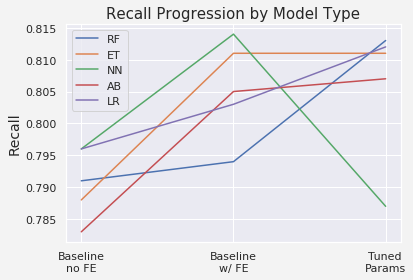

In [565]:
fig = plt.figure()
fig.patch.set_facecolor('#f3f3f3')

for row in range(len(improvement_copy)):
    result = []
    result.append(improvement_copy.iloc[row][0])
    result.append(improvement_copy.iloc[row][6])
    result.append(improvement_copy.iloc[row][7])
    result.append(improvement_copy.iloc[row][8])
    plt.plot(result[1:4],label=result[0])

#set gray background
ax = plt.gca()
#ax.set_facecolor('#f2f2f2')

# draw solid white grid lines
#plt.grid(color='w', linestyle='solid')

plt.legend(loc='best')
plt.xticks(range(3),['Baseline\nno FE','Baseline\nw/ FE','Tuned\nParams'])
plt.title("Recall Progression by Model Type", fontsize=15)
plt.ylabel('Recall',fontsize=14)
plt.show()

In [566]:
# Summarize Acc baseline vs. optimized params

#sort on index so they have the same ordering
allmodel_baseline_df = allmodel_baseline_df.sort_index(axis=0)
allmodel_df = allmodel_df.sort_index(axis=0)
allmodel_baseline_noFE = allmodel_baseline_noFE.sort_index(axis=0)

improvement_acc = pd.DataFrame(columns=['Model Type','Base noFE Acc','Base w/FE Acc','Tune Acc'])

model_type= list(allmodel_baseline_df['Model Type'])
baseline_noFE_acc =  list(allmodel_baseline_noFE['Accuracy'])
baseline_acc = list(allmodel_baseline_df['Accuracy'])
opt_acc = list(allmodel_df['Accuracy'])
improvement_acc['Model Type'] = model_type
improvement_acc['Base noFE Acc'] = baseline_noFE_acc
improvement_acc['Base w/FE Acc'] = baseline_acc
improvement_acc['Tune Acc'] = opt_acc
improvement_acc['FE % Imp Acc'] = (improvement_acc['Base w/FE Acc'] - improvement_acc['Base noFE Acc'])/improvement_acc['Base noFE Acc']
improvement_acc['Tune % Imp Acc'] = (improvement_acc['Tune Acc'] - improvement_acc['Base w/FE Acc'])/improvement_acc['Base w/FE Acc']

improvement_acc = improvement_acc.sort_values(by=['Tune Acc'],axis=0,ascending=False)
improvement_acc = improvement_acc.round(3)
improvement_acc

,Model Type,Base noFE Acc,Base w/FE Acc,Tune Acc,FE % Imp Acc,Tune % Imp Acc
1,Random Forest,0.775,0.794,0.818,0.024,0.030
4,Extra Trees,0.779,0.805,0.811,0.033,0.008
2,Neural Net,0.775,0.792,0.784,0.021,-0.009
3,AdaBoost,0.719,0.744,0.765,0.034,0.029
0,Logistic Regression,0.726,0.732,0.746,0.009,0.019


In [567]:
improvement_acc.loc[0,'Model Type'] = 'LR'
improvement_acc.loc[1,'Model Type'] = 'RF'
improvement_acc.loc[2,'Model Type'] = 'NN'
improvement_acc.loc[3,'Model Type'] = 'AB'
improvement_acc.loc[4,'Model Type'] = 'ET'

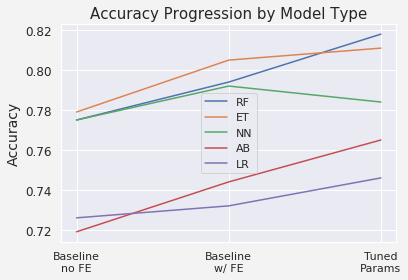

In [568]:
fig = plt.figure()
fig.patch.set_facecolor('#f3f3f3')

for row in range(len(improvement_copy)):
    result = []
    result.append(improvement_acc.iloc[row][0])
    result.append(improvement_acc.iloc[row][1])
    result.append(improvement_acc.iloc[row][2])
    result.append(improvement_acc.iloc[row][3])
    plt.plot(result[1:4],label=result[0])

#ax = plt.gca()
#ax.spines['bottom'].set_color('.1')
#ax.spines['top'].set_color('.1')
#ax.spines['right'].set_color('.1')
#ax.spines['left'].set_color('.1')
    
plt.legend(loc='best')
plt.xticks(range(3),['Baseline\nno FE','Baseline\nw/ FE','Tuned\nParams'])
plt.yticks(fontsize=12)
plt.title("Accuracy Progression by Model Type", fontsize=15)
plt.ylabel('Accuracy',fontsize=14)

plt.show()

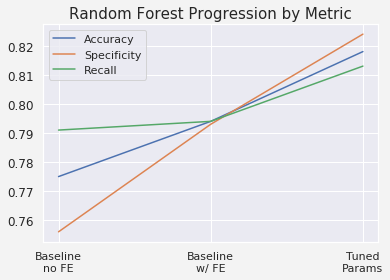

In [569]:
#plot random forest accuracy by metric type
fig = plt.figure()
fig.patch.set_facecolor('#f3f3f3')

plt.plot(list(improvement_acc.loc[1][1:4]),label='Accuracy')
plt.plot(list(improvement_copy.loc[1][1:4]),label='Specificity')
plt.plot(list(improvement_copy.loc[1][6:9]),label='Recall')

#ax = plt.gca()
#ax.spines['bottom'].set_color('.1')
#ax.spines['top'].set_color('.1')
#ax.spines['right'].set_color('.1')
#ax.spines['left'].set_color('.1')

plt.legend(loc='best')
plt.xticks(range(3),['Baseline\nno FE','Baseline\nw/ FE','Tuned\nParams'])
plt.yticks(fontsize=12)
plt.title("Random Forest Progression by Metric", fontsize=15)
plt.ylabel('',fontsize=14)
plt.show()


### Final Test Result

In [86]:
#now calculate our final test result
from sklearn.ensemble import RandomForestClassifier

#create a dataframe to show our final result
test_result = pd.DataFrame(columns=['Model Type','num estimators','max depth',\
    'min samples split','min samples leaf','max features','max leaf nodes','Accuracy','F1','AUC',\
    'Log Loss','Precision','Recall','Specificity'])

#manually re-create the best model that lead to our top specificity result in cross validation
rfc = RandomForestClassifier(random_state=42, n_estimators=40, max_depth=None, min_samples_split=2,\
                                    min_samples_leaf=1,max_features=None,max_leaf_nodes=None)

test_result = sklearn_gridsearch_cv_wseeding(rfc,'Random Forest',[14,None,2,1,None,None],test_result,'test')

test_result = test_result.drop(columns=['F1','AUC','Log Loss','Precision'])
#test_result = test_result.round(3)
test_result.round(3)

,Model Type,num estimators,max depth,min samples split,min samples leaf,max features,max leaf nodes,Accuracy,Recall,Specificity
0,Random Forest,14,None,2,1,None,None,0.827,0.861,0.788


In [87]:
#show val vs. test

rf_bestmodel = rf_results.loc[32].to_frame().T 
rf_bestmodel = rf_bestmodel.drop(['num estimators','max depth','min samples split','min samples leaf','max features','max leaf nodes','F1','AUC','Log Loss','Precision'],axis=1)
rf_bestmodel['Val Specificity'] = rf_bestmodel['Specificity']
rf_bestmodel['Val Recall'] = rf_bestmodel['Recall']
rf_bestmodel['Val Accuracy'] = rf_bestmodel['Accuracy']
rf_bestmodel['Test Specificity'] = float(test_result['Specificity'])
rf_bestmodel['Test Recall'] = float(test_result['Recall'])
rf_bestmodel['Test Accuracy'] = float(test_result['Accuracy'])
rf_bestmodel = rf_bestmodel.drop(['Accuracy','Recall','Specificity'],axis=1)
display(rf_bestmodel)
rf_bestmodel =rf_bestmodel.drop(['Model Type'],axis=1)

,Model Type,Val Specificity,Val Recall,Val Accuracy,Test Specificity,Test Recall,Test Accuracy
32,Random Forest,0.824441,0.812552,0.817685,0.787709,0.860577,0.826873


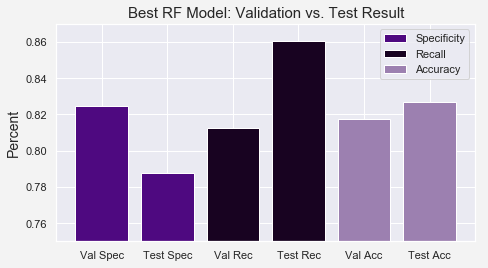

In [89]:
#show val vs. test bar chart
plotvals = rf_bestmodel.iloc[0]
fig = plt.figure(figsize=(7.5,4))
fig.patch.set_facecolor('#f3f3f3')
#plt.figure(figsize=(8,5))
plt.bar(['Val Spec','Test Spec'], [plotvals[0],plotvals[3]], label = 'Specificity', color = '#4e0980')
plt.bar(['Val Rec','Test Rec'], [plotvals[1],plotvals[4]], label = 'Recall', color = '#180321') #000000
plt.bar(['Val Acc','Test Acc'], [plotvals[2],plotvals[5]], label = 'Accuracy', color='#9c80b0')
plt.ylabel('Percent',fontsize=14)
plt.title('Best RF Model: Validation vs. Test Result', fontsize=15)
plt.legend(loc = 'best')
plt.ylim(.75,.87)
plt.show()

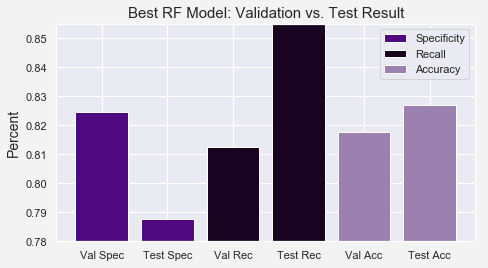

In [90]:
#show val vs. test bar chart
plotvals = rf_bestmodel.iloc[0]
fig = plt.figure(figsize=(7.5,4))
fig.patch.set_facecolor('#f3f3f3')
#plt.figure(figsize=(8,5))
plt.bar(['Val Spec','Test Spec'], [plotvals[0],plotvals[3]], label = 'Specificity', color = '#4e0980')
plt.bar(['Val Rec','Test Rec'], [plotvals[1],plotvals[4]], label = 'Recall', color = '#180321') #000000
plt.bar(['Val Acc','Test Acc'], [plotvals[2],plotvals[5]], label = 'Accuracy', color='#9c80b0')
plt.ylabel('Percent',fontsize=14)
plt.title('Best RF Model: Validation vs. Test Result', fontsize=15)
plt.legend(loc = 'best')
plt.ylim(.78,.855)
plt.show()

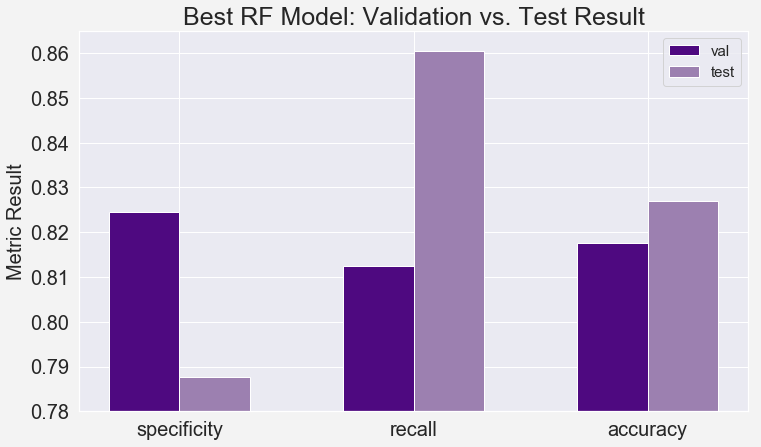

In [290]:
plotvals = rf_bestmodel.iloc[0]
fig = plt.figure(figsize=(12,7))
fig.patch.set_facecolor('#f3f3f3')
plt.ylim(.78,.865)
heights = [plotvals[:3].values.tolist(), plotvals[3:].values.tolist()]
w = [-.15, .15]
labels = ['val', 'test']
colors = ['#4e0980', '#9c80b0']
for i in range(2):
    plt.bar([0 + w[i], 1 + w[i], 2 + w[i]], heights[i], width = .3, color = colors[i], label = labels[i])
plt.legend(fontsize=15)
plt.ylabel('Metric Result',fontsize=20)
plt.xticks(np.arange(3), ['specificity', 'recall', 'accuracy'], fontsize=20)
plt.yticks(fontsize=20)
plt.title('Best RF Model: Validation vs. Test Result', fontsize=25)
# plt.legend(loc = 'best')

plt.show()

In [115]:
le_mapping = pd.read_csv('le_mapping')

In [119]:
le_mapping.head()

,Property,Industry,PropertyLoc,GreaterCity,Subregion,Use_Type,ConstructionType,UnitType,Reason
0,1 ROCKEFELLER PLAZA,ACCOUNTING,BR-PROPERTY,BERLIN,CALIFORNIA,COMMERCIAL,NEW DEVELOPMENT,ADVERTISING,CONTRACTION
1,10 ROCKEFELLER PLAZA,AUTOMOBILES & COMPONENTS,CN-PROPERTY,BOSTON,"DC, MD, VA, PA",MIXED USE,REDEVELOPMENT,ANTENNA,CORRECTION
2,10 SOUTH WACKER,BANKS,EU-PROPERTY,CHICAGO,"NY, NJ, CT, MA",NaN,NaN,BASEMENT,EARLY TERMINATION
3,100 NOX,CAPITAL GOODS,IN-PROPERTY,FRANKFURT,WASHINGTON,NaN,NaN,COMMON PARTS,EXPANSION
4,1099 NEW YORK AVENUE,COMMERICAL & PROFESSIONAL SERVICES/SUPPLIERS,US-PROPERTY,HYDERABAD,"WI, IL",NaN,NaN,CONDUIT,NEW


In [121]:
#check the feature importances
#etc.fit(X_train,y_train)
feat_imp = list(zip(modeling_data.columns.tolist(),rfc.feature_importances_.tolist()))
feat_imp_df = pd.DataFrame(feat_imp, columns=['Column','Feature Importance'])
# feat_imp_df.sort_values(by=['Feature Importance'],axis=0,ascending=False).head()
feat_imp_df.head()

,Column,Feature Importance
0,StartingPerSqFt_USD,0.043746
1,UnitArea,0.037301
2,MonthsFreeRent,0.030236
3,NumPriceChanges,0.012624
4,NumFreeRentPeriods,0.006626


In [156]:
le_mapping.head()

,Property,Industry,PropertyLoc,GreaterCity,Subregion,Use_Type,ConstructionType,UnitType,Reason
0,1 ROCKEFELLER PLAZA,ACCOUNTING,BR-PROPERTY,BERLIN,CALIFORNIA,COMMERCIAL,NEW DEVELOPMENT,ADVERTISING,CONTRACTION
1,10 ROCKEFELLER PLAZA,AUTOMOBILES & COMPONENTS,CN-PROPERTY,BOSTON,"DC, MD, VA, PA",MIXED USE,REDEVELOPMENT,ANTENNA,CORRECTION
2,10 SOUTH WACKER,BANKS,EU-PROPERTY,CHICAGO,"NY, NJ, CT, MA",NaN,NaN,BASEMENT,EARLY TERMINATION
3,100 NOX,CAPITAL GOODS,IN-PROPERTY,FRANKFURT,WASHINGTON,NaN,NaN,COMMON PARTS,EXPANSION
4,1099 NEW YORK AVENUE,COMMERICAL & PROFESSIONAL SERVICES/SUPPLIERS,US-PROPERTY,HYDERABAD,"WI, IL",NaN,NaN,CONDUIT,NEW


In [176]:
col_feat = []
for i in range(len(feat_imp_df)):
#     print(feat_imp_df.loc[i].Column)
#     print(le_mapping.columns.tolist())
    val_append = feat_imp_df.loc[i].Column
    for le_col in le_mapping.columns.tolist():
        if le_col + '_' in feat_imp_df.loc[i].Column and '_hasnulls' not in feat_imp_df.loc[i].Column:
#             print(le_col, feat_imp_df.loc[i].Column)
            val = feat_imp_df.loc[i].Column.split('_')[-1].split('.')[0]
#             print((val))
            col_ind = int(val)
#             print(col_ind, le_col)
#             print(col_ind.strip('.0'))
#             print(type(col_ind))
#             print('append')
            val_append = le_col + '_' + str(le_mapping.loc[col_ind, le_col])
#             print(val_append)
    col_feat.append(val_append)                         

In [187]:
feat_imp_df['Column_Name'] = col_feat

# feat_imp_df.sort_values(by=['Feature Importance'],axis=0,ascending=False).head()
feat_imp_sorted = feat_imp_df[['Column_Name', 'Feature Importance']].sort_values(by=['Feature Importance'],axis=0,ascending=False)

In [188]:
feat_imp_sorted

,Column_Name,Feature Importance
6,lease_length,0.082790
17,simult_months,0.073693
146,Reason_RELOCATION,0.068100
89,PropertyLoc_IN-PROPERTY,0.049728
0,StartingPerSqFt_USD,0.043746
...,...,...
222,Property_LE CRISTALIA,0.000000
9,AmountofFloors,0.000000
204,Property_BCGT_TORRE CENTRAL,0.000000
196,Property_AMERICAN RED CROSS,0.000000


In [215]:
feat_imp_sorted['Column_Name'].loc[52]

'Industry_COMMERICAL & PROFESSIONAL SERVICES/SUPPLIERS'

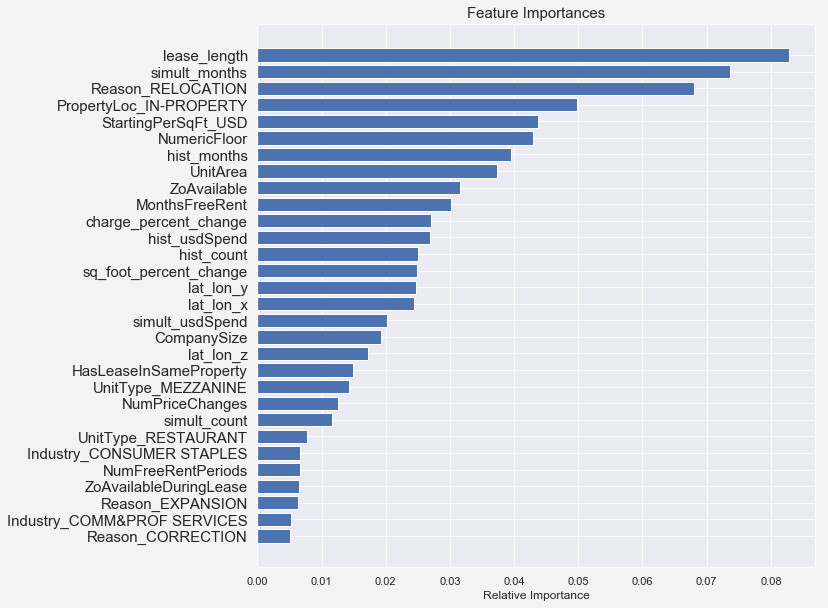

In [217]:
fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('#f3f3f3')
feat_imp_sorted = feat_imp_sorted.replace('Industry_COMMERICAL & PROFESSIONAL SERVICES/SUPPLIERS', 'Industry_COMM&PROF SERVICES')
plt.title('Feature Importances', fontsize=15)
plt.barh(range(30), feat_imp_sorted['Feature Importance'][:30])
plt.yticks(range(30), feat_imp_sorted['Column_Name'], fontsize=15)
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()
plt.show()

In [227]:
def sklearn_gridsearch_cv_wseeding_confusionmatrix(model,modeltype_str,params,results_df,train_or_test):
    if train_or_test=='train' or train_or_test=='noFE':
        #create empty lists for aggregate scores
        accuracy, f1, auc, logloss, precision, recall, specificity = [],[],[],[],[],[],[]
        
        #create a k-fold split to use in grid search
        kf = KFold(n_splits=5, random_state=42)

        #now create and validate a model for each split, and add scores to agg lists
        for train_index, test_index in kf.split(X_train_cv):
            if train_or_test=='noFE':
                X_train, X_test = X_train_baseline.iloc[train_index], X_train_baseline.iloc[test_index]
            else:
                X_train, X_test = X_train_cv.iloc[train_index], X_train_cv.iloc[test_index]
            y_train, y_test = y_train_cv[train_index], y_train_cv[test_index]
            model.fit(X_train,y_train)
            preds = model.predict(X_test)
            probabilities = model.predict_proba(X_test)
            accuracy_score = model.score(X_test,y_test)
            f1score = f1_score(preds,y_test, average='micro')
            auc_score = roc_auc_score(y_test,probabilities[:,1])
            logloss_score = log_loss(y_test,probabilities)
            precisionscore = precision_score(y_test, preds)
            recallscore = recall_score(y_test, preds)
            #now get the index of the negative results for calculating specificity
            X_test_neg = X_test[y_test==0]
            y_test_neg = y_test[y_test==0]
            specificity_score = model.score(X_test_neg,y_test_neg)
            
            #now add the k-fold results to the list
            accuracy.append(accuracy_score)
            f1.append(f1score)
            auc.append(auc_score)
            logloss.append(logloss_score)
            precision.append(precisionscore)
            recall.append(recallscore)
            specificity.append(specificity_score)
        
        #once all k-fold splits have been run, calculate the average scores
        accuracy = np.average(accuracy)
        f1 = np.average(f1)
        auc = np.average(auc)
        logloss = np.average(logloss)
        precision = np.average(precision)
        recall = np.average(recall)
        specificity = np.average(specificity)
            
    elif train_or_test=='test':
        model.fit(X_train_cv,y_train_cv)
        preds = model.predict(X_test_cv)
#         print(len(preds))
#         print(len(y_test_cv))
        probabilities = model.predict_proba(X_test_cv)
        accuracy = model.score(X_test_cv,y_test_cv)
        f1 = f1_score(preds,y_test_cv, average='micro')
        #auc_score = roc_auc_score(y_test_cv,np.amax(probabilities,axis=1))
        auc = roc_auc_score(y_test_cv,probabilities[:,1])
        logloss = log_loss(y_test_cv,probabilities)
        precision = precision_score(y_test_cv, preds)
        recall = recall_score(y_test_cv, preds)
        #now get the index of the negative results for calculating specificity
        X_test_neg = X_test_cv[y_test_cv==0]
        y_test_neg = y_test_cv[y_test_cv==0]
        specificity = model.score(X_test_neg,y_test_neg)
        return preds, y_test_cv
    else:
        raise NameError("Final Argument to sklearn_gridsearch_cv must be train, test, or noFE")
        
    params.insert(0,modeltype_str)
    params.append(accuracy)
    params.append(f1)
    params.append(auc)
    params.append(logloss)
    params.append(precision)
    params.append(recall)
    params.append(specificity)
    results_df.loc[len(results_df)]=params
    

In [229]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

preds, y_test_cv = sklearn_gridsearch_cv_wseeding_confusionmatrix(rfc,'Random Forest',[14,None,2,1,None,None],test_result,'test')

tn, fp, fn, tp = confusion_matrix(y_test_cv, preds).ravel()
print(tn, fp, fn, tp )

141 38 29 179


In [273]:
labels

[['True Negatives: 141', 38], [29, 179]]

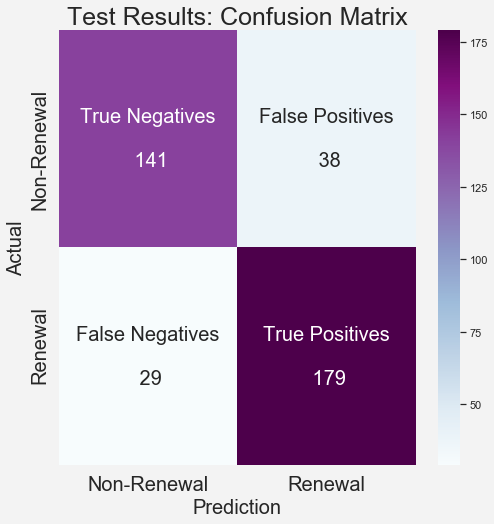

In [287]:
fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor('#f3f3f3')
labels = np.array([[ 'True Negatives\n\n %d' %tn, 'False Positives\n\n %d' %fp], ['False Negatives\n\n %d' %fn, 'True Positives\n\n %d' %tp]])
sns.heatmap([[tn, fp], [fn, tp]], annot=labels, cmap="BuPu", fmt = '', annot_kws={"size": 20})
plt.title('Test Results: Confusion Matrix', fontsize=25)
plt.xticks(np.arange(2) + .5, ['Non-Renewal', 'Renewal'], fontsize=20)
plt.yticks(np.arange(2) + .3, ['Non-Renewal', 'Renewal'], fontsize=20)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Actual', fontsize=20)

plt.show()